In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)

In [2]:
# read approved loan data from corresponding excels
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', low_memory=False, compression='gzip')



In [3]:
a_lc = accepted.copy()

In [134]:
# read rejected loan data from corresponding excels
r_lc = pd.read_csv("rejected_2007_to_2018Q4.csv.gz", low_memory=False)

In [4]:
#check the approved loan data
a_lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

## EDA

In [5]:
# Check the size
a_lc.shape

(2260701, 151)

In [136]:
#Checking the rejected loan data
r_lc.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [137]:
r_lc.shape

(27648741, 9)

In [7]:
a_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [8]:
# remove not needed columns:
a_lc.drop(['all_util', 'bc_util','acc_open_past_24mths','url','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high',
           'sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util',
           'sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med',
           'sec_app_mths_since_last_major_derog','hardship_type','hardship_reason','hardship_status','deferral_term','deferral_term',
           'hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length',
           'hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount',
           'hardship_last_payment_amount','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount',
           'settlement_percentage','settlement_term','funded_amnt','funded_amnt_inv','pymnt_plan','pymnt_plan','hardship_flag',
           'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','out_prncp',
           'out_prncp_inv','recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
           'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 
           'total_rev_hi_lim', 'acc_open_past_24mths','bc_open_to_buy', 'chargeoff_within_12_mths', 'delinq_amnt', 
           'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 
           'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 
           'num_op_rev_tl','num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
           'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq','tax_liens', 'tot_hi_cred_lim',
           'total_bc_limit', 'total_il_high_credit_limit','disbursement_method',
           'debt_settlement_flag','verification_status_joint','dti_joint','annual_inc_joint',
          'mths_since_recent_bc_dlq','mths_since_recent_revol_delinq',
          'next_pymnt_d','mths_since_last_delinq','il_util','mths_since_rcnt_il',
          'open_acc_6m','total_cu_tl','inq_last_12m','open_il_24m','open_act_il','total_bal_il','open_rv_12m',
          'open_rv_24m','open_il_12m','emp_title','max_bal_bc','desc','member_id',
          'num_rev_accts', 'initial_list_status', 'application_type', 'percent_bc_gt_75'], axis=1,inplace=True)  

### Missing Data Handling

In [9]:
# Check missing values count and percent
missing= a_lc.isnull().sum().sort_values(ascending=False)
percent= (a_lc.isnull().sum()/a_lc.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(100)

,Total,Percent
mths_since_last_record,1901545,84.113069
mths_since_last_major_derog,1679926,74.309960
inq_fi,866162,38.313868
emp_length,146940,6.499754
avg_cur_bal,70379,3.113149
tot_cur_bal,70309,3.110053
tot_coll_amt,70309,3.110053
total_bal_ex_mort,50063,2.214490
mort_acc,50063,2.214490
title,23358,1.033219


In [10]:
# Removing the 33 rows where home ownership data was missing
a_lc = a_lc[-a_lc.home_ownership.isna()]

In [11]:
#drop significantly missing values
a_lc.drop(['mths_since_last_record','mths_since_last_major_derog'], axis=1, inplace=True)

In [ ]:
# Checking the dataset for the loan data delinquest over 2 years
a_lc.loc[a_lc.delinq_2yrs.isnull() == True]

In [ ]:
# Checking the dataset how many records are having total account blank
a_lc.loc[a_lc.total_acc.isnull() == True]

In [14]:
# Missing value imputation

# Filling the mode in place of the missing values
a_lc["inq_fi"].value_counts()
a_lc["inq_fi"]= a_lc["inq_fi"].fillna(a_lc["inq_fi"].mode()[0])
a_lc["emp_length"]= a_lc["emp_length"].fillna(a_lc["emp_length"].mode()[0])
a_lc["mort_acc"]= a_lc["mort_acc"].fillna(a_lc["mort_acc"].mode()[0])
a_lc["title"]= a_lc["title"].fillna(a_lc["title"].mode()[0])
a_lc["pub_rec_bankruptcies"]= a_lc["pub_rec_bankruptcies"].fillna(a_lc["pub_rec_bankruptcies"].mode()[0])
a_lc["zip_code"]= a_lc["zip_code"].fillna(a_lc["zip_code"].mode()[0])
a_lc["int_rate"]= a_lc["int_rate"].fillna(a_lc["int_rate"].mode()[0])
a_lc["open_acc"]= a_lc["open_acc"].fillna(a_lc["open_acc"].mode()[0])
a_lc["verification_status"]= a_lc["verification_status"].fillna(a_lc["verification_status"].mode()[0])
a_lc["term"]= a_lc["term"].fillna(a_lc["term"].mode()[0])
a_lc["grade"]= a_lc["grade"].fillna(a_lc["grade"].mode()[0])
a_lc["sub_grade"]= a_lc["sub_grade"].fillna(a_lc["sub_grade"].mode()[0])
a_lc["home_ownership"]= a_lc["home_ownership"].fillna(a_lc["home_ownership"].mode()[0])
a_lc["loan_status"]= a_lc["loan_status"].fillna(a_lc["loan_status"].mode()[0])
a_lc["purpose"]= a_lc["purpose"].fillna(a_lc["purpose"].mode()[0])
a_lc["addr_state"]= a_lc["addr_state"].fillna(a_lc["addr_state"].mode()[0])
a_lc["issue_d"]= a_lc["issue_d"].fillna(a_lc["issue_d"].mode()[0])
a_lc["earliest_cr_line"] = a_lc["earliest_cr_line"].fillna(a_lc["earliest_cr_line"].mode()[0])


In [15]:
# Missing value imputation

# Filling the median in place of the missing values
a_lc["avg_cur_bal"].value_counts()
a_lc["avg_cur_bal"]= a_lc["avg_cur_bal"].fillna(a_lc["avg_cur_bal"].median())
a_lc["tot_cur_bal"]= a_lc["tot_cur_bal"].fillna(a_lc["tot_cur_bal"].median())
a_lc["total_bal_ex_mort"]= a_lc["total_bal_ex_mort"].fillna(a_lc["total_bal_ex_mort"].median())
a_lc["dti"]= a_lc["dti"].fillna(a_lc["dti"].median())
a_lc["revol_util"]=a_lc["revol_util"].fillna(a_lc["revol_util"].median())
a_lc["total_acc"]= a_lc["total_acc"].fillna(a_lc["total_acc"].median())
a_lc["annual_inc"]= a_lc["annual_inc"].fillna(a_lc["annual_inc"].median())
a_lc["inq_last_6mths"] = a_lc["inq_last_6mths"].fillna(a_lc["inq_last_6mths"].median())
a_lc["delinq_2yrs"] = a_lc["delinq_2yrs"].fillna(a_lc["delinq_2yrs"].median())
a_lc["open_acc"] = a_lc["open_acc"].fillna(a_lc["open_acc"].median())
a_lc["pub_rec"] = a_lc["pub_rec"].fillna(a_lc["pub_rec"].median())
a_lc["tot_coll_amt"]= a_lc["tot_coll_amt"].fillna(a_lc["tot_coll_amt"].median())
a_lc["loan_amnt"]= a_lc["loan_amnt"].fillna(a_lc["loan_amnt"].median())
a_lc["fico_range_low"]= a_lc["fico_range_low"].fillna(a_lc["fico_range_low"].median())
a_lc["fico_range_high"]= a_lc["fico_range_high"].fillna(a_lc["fico_range_high"].median())


In [ ]:
# Re-Check missing values count and percent - No more missing data
missing= a_lc.isnull().sum().sort_values(ascending=False)
percent= (a_lc.isnull().sum()/a_lc.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
missing_data

### Data Vizualisation and Analysis

we assume that the model will be used when one begins to apply for the loan. 
Therefore, there should be no information about user's payment behaviors.

In [ ]:
# Loan counts group by Loan Status
ls = a_lc.groupby('loan_status').count()['loan_amnt']
ls

Text(0, 0.5, 'Loan Amount')

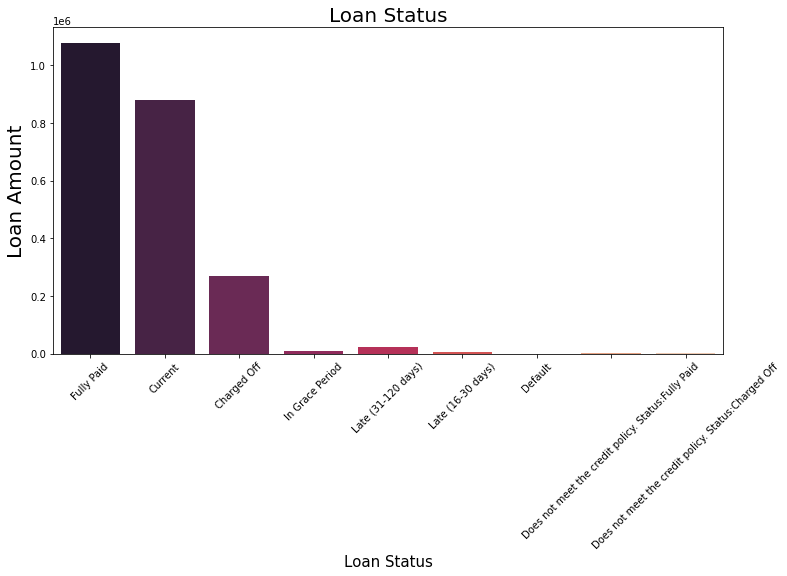

In [18]:
# Loan Status
plt.figure(figsize = (12,6))
g = sns.countplot(x="loan_status",data=a_lc,
                  palette="rocket")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

In [ ]:
# check the current loans
current = a_lc.loc[a_lc.loan_status == 'Current']
current

In [20]:
# Excluding the current loans from dataset
a_lc = a_lc[a_lc.loan_status != 'Current']
a_lc.shape

(1382351, 35)

In [21]:
# Creating loan_category as an intermediate feature for vizualization purpose
a_lc["loan_category"] = np.where((a_lc.loan_status == 'Fully Paid') |
                        (a_lc.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 'Fully Paid', 'Charged Off')

In [22]:
# Excluding Grace period and late payment statuses as those are ambiguous to predict
a_lc = a_lc.loc[a_lc['loan_status'].isin(['Fully Paid','Charged Off', 
                                           'Does not meet the credit policy. Status:Fully Paid',
                                          'Does not meet the credit policy. Status:Charged Off',
                                          'Default'])]


In [ ]:
# Sorting the data set by Issue Date
a_lc = a_lc.sort_values(by='issue_d')
a_lc

In [24]:
# Cleaning the data to keep the numeric values
a_lc['home_ownership'] = a_lc['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
a_lc['term'] = a_lc['term'].replace({'months':''}, regex = True)
a_lc['emp_length'] = a_lc['emp_length'].replace('< 1 year', '0 years')
a_lc['emp_length'] = a_lc['emp_length'].replace('10+ years', '10 years')
a_lc['emp_length'] = a_lc['emp_length'].replace({'year':'', 's':'', '\+':''}, regex = True)

# a_lc[['Profit', 'Sales']] = orders[['Profit', 'Sales']].apply(pd.to_numeric)


In [25]:
# Checking loan category counts
a_lc['loan_category'].value_counts()

Fully Paid     1078739
Charged Off     269360
Name: loan_category, dtype: int64

In [26]:
numeric_var = ['loan_amnt', 'int_rate', 'installment', 'delinq_2yrs','annual_inc','dti', 
               'fico_range_low', 'fico_range_high', 'open_acc', 'total_acc', 'pub_rec', 'revol_bal', 'revol_util',
               'tot_coll_amt', 'tot_cur_bal', 'inq_last_6mths', 'inq_fi', 'avg_cur_bal', 'mort_acc',
               'pub_rec_bankruptcies', 'total_bal_ex_mort']

ordinal_var = ['term', 'grade', 'sub_grade', 'emp_length', 'verification_status']

nominal_var = ['home_ownership','purpose', 'title', 'zip_code', 'addr_state']

other = ['id', 'issue_d','loan_category', 'loan_status', 'earliest_cr_line']


In [25]:
def numeric_plot(v):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(a_lc.loc[a_lc[v].notnull(), v], kde=False, ax=ax1)
    ax1.set_title(f'Loan Status vs {v}')
    ax1.set_xlabel(v)
    ax1.set_ylabel('Count')
    
    sns.boxplot(x='loan_category', y=v, data=a_lc, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(v + ' by Loan Status')
    ax2.set_xlabel(v)
    
    plt.tight_layout()
    
    

In [23]:
a_lc.groupby('term')['loan_category'].value_counts().loc[:,'Charged Off']

term
 36     163926
 60     105434
Name: loan_category, dtype: int64

In [81]:
def categorical_plot(v):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.countplot(a_lc[v], palette = 'rocket', ax=ax1)
    ax1.set_title(f'Loan Status vs {v}')
    ax1.set_xlabel(v)
    ax1.set_ylabel('Count')
    
    
    good_rates = a_lc.groupby(v)['loan_category'].value_counts(normalize=True).loc[:,'Fully Paid']
    sns.barplot(x=good_rates.index, y=good_rates.values, palette = 'rocket', ax=ax2)
    ax2.set_ylabel('Fraction of Good Loans')
    ax2.set_title('Fully Paid Rate by ' + v)
    ax2.set_xlabel(v)
    ax2.set_ylim(0,1)
    
    
    plt.tight_layout()
#     order=sorted(a_lc[v].unique())

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

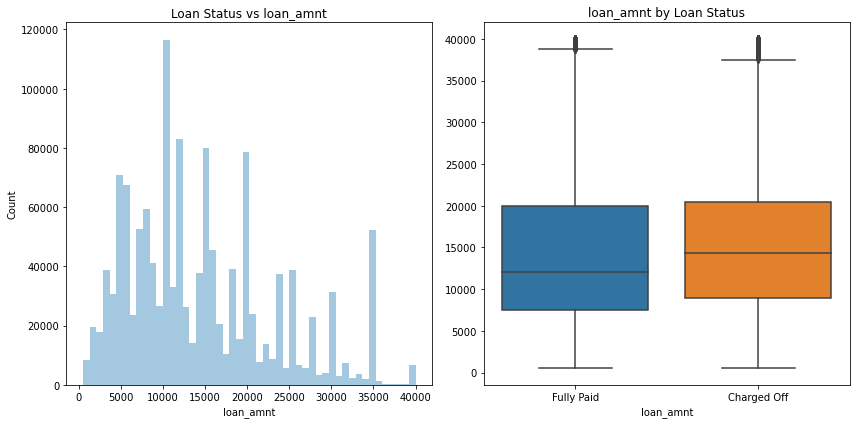

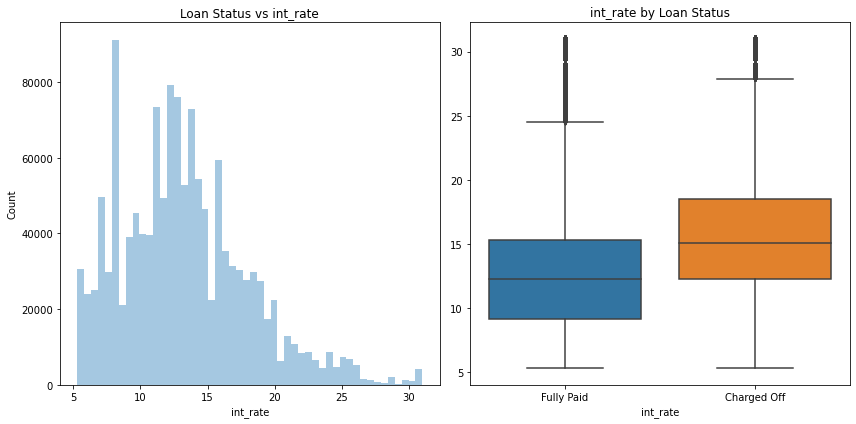

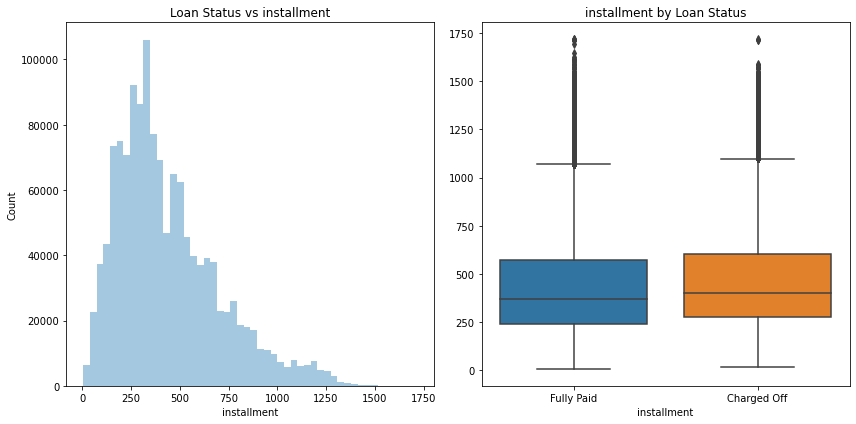

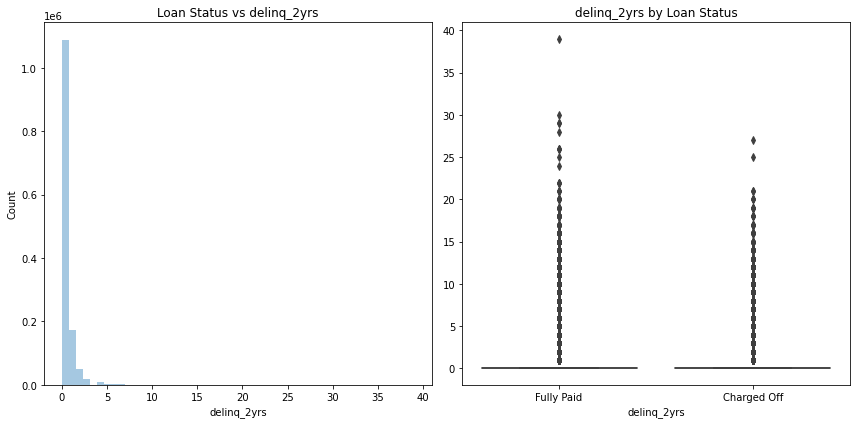

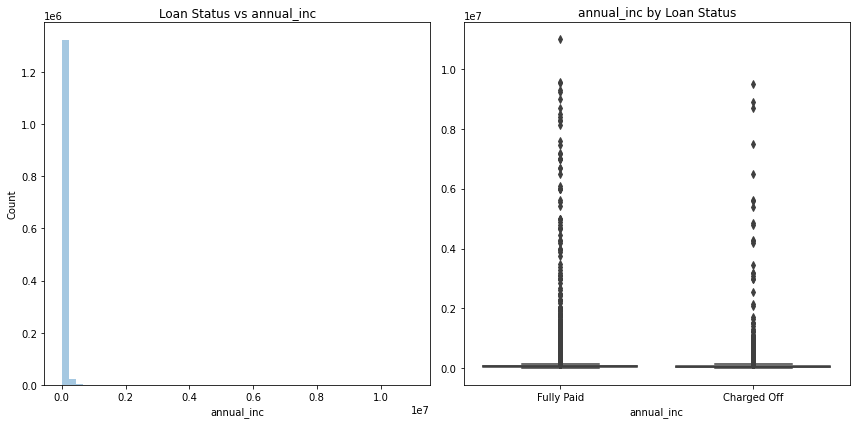

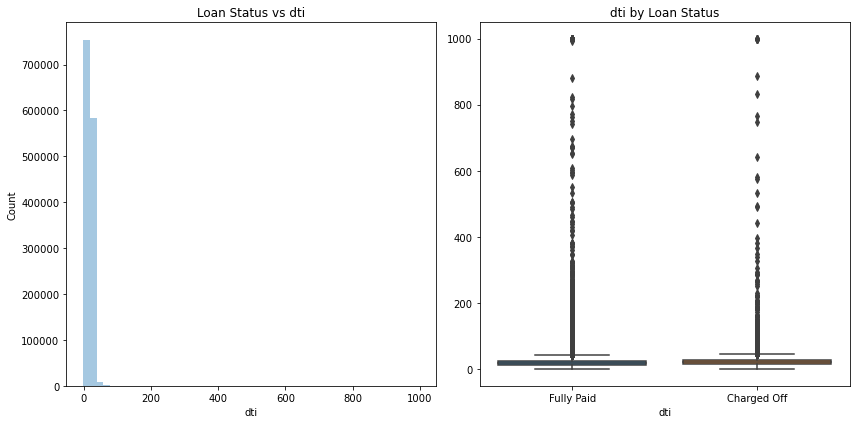

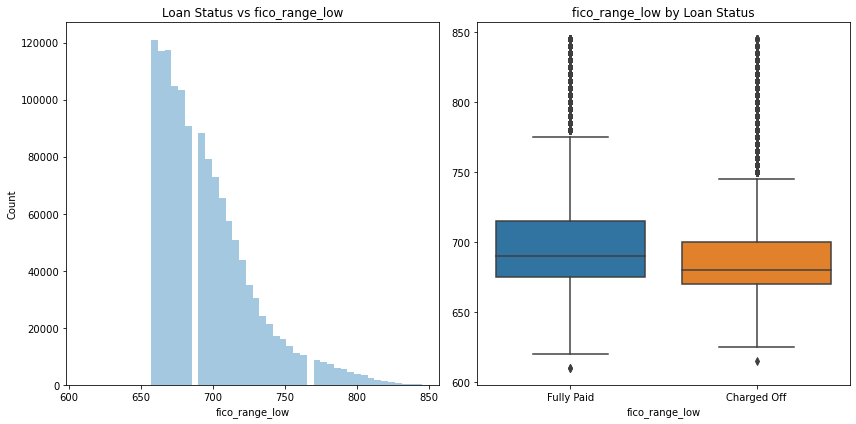

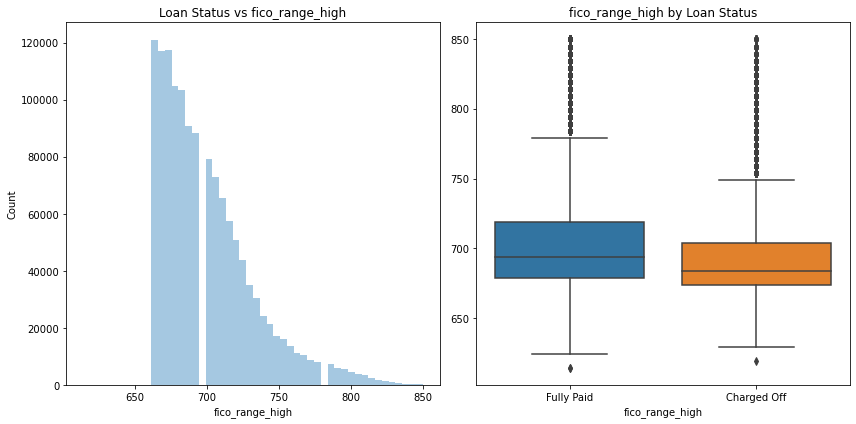

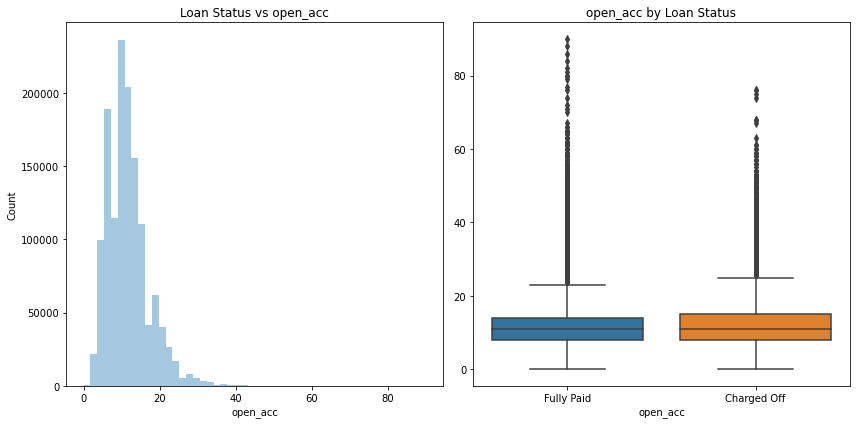

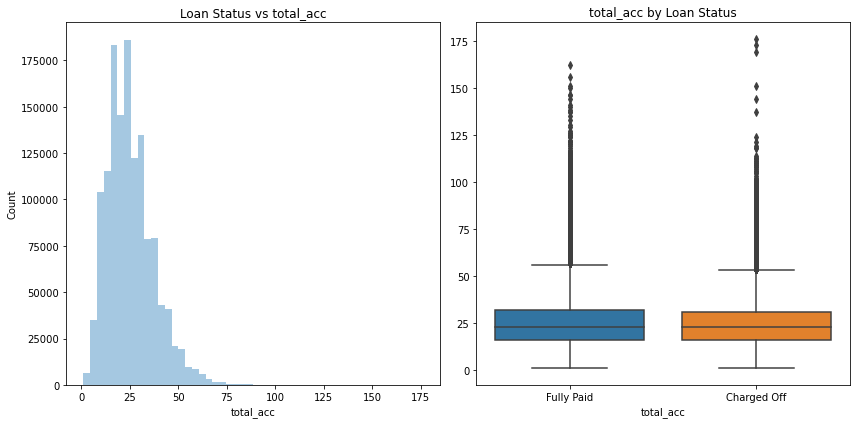

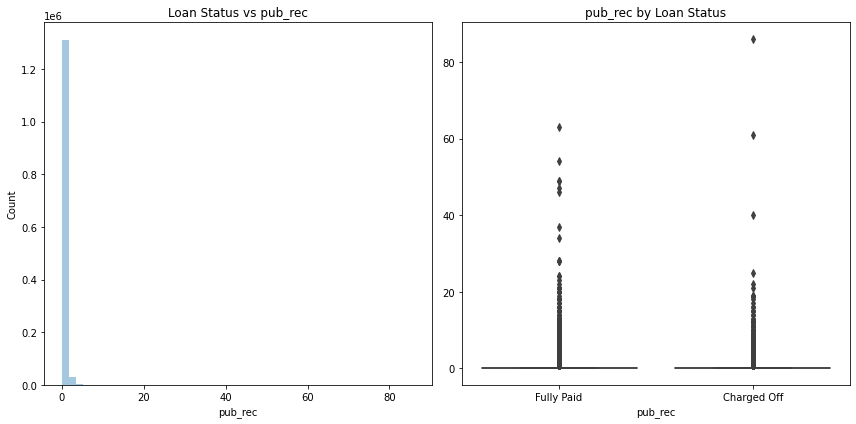

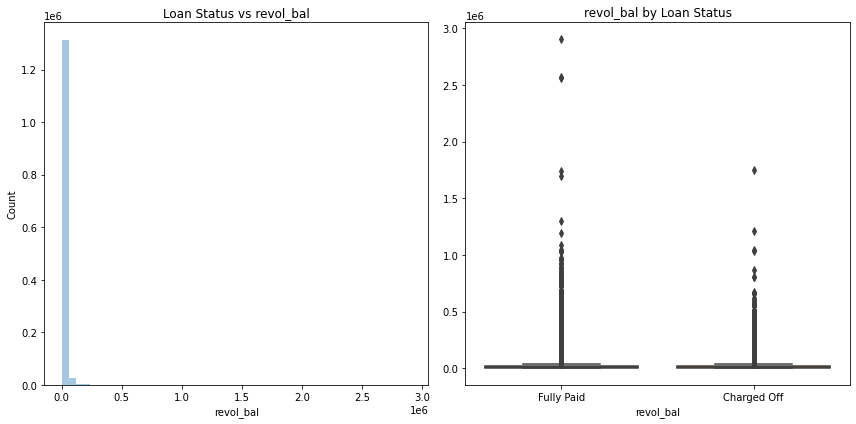

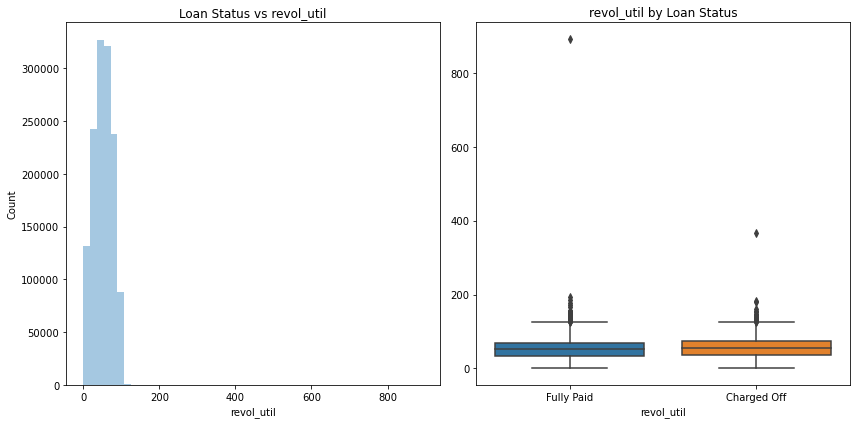

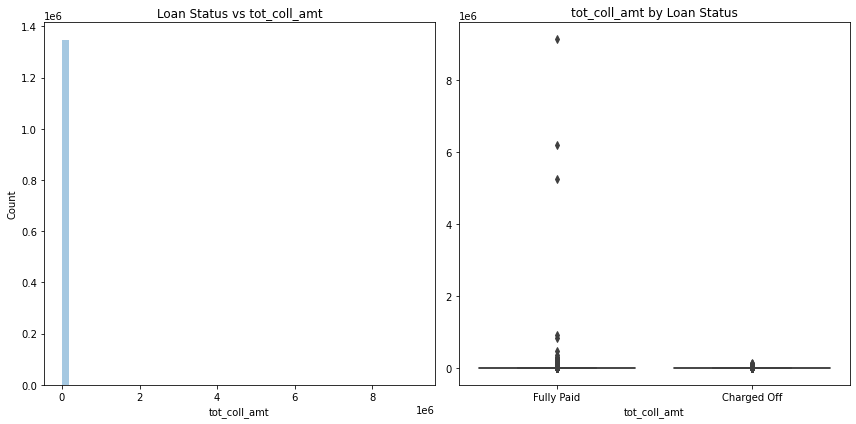

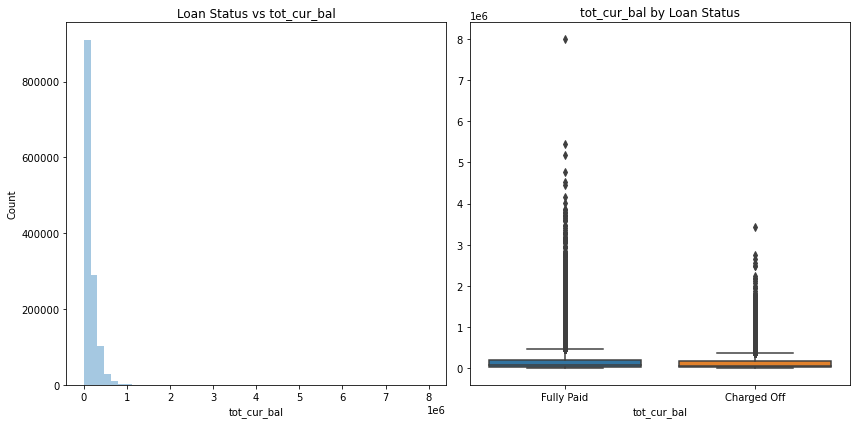

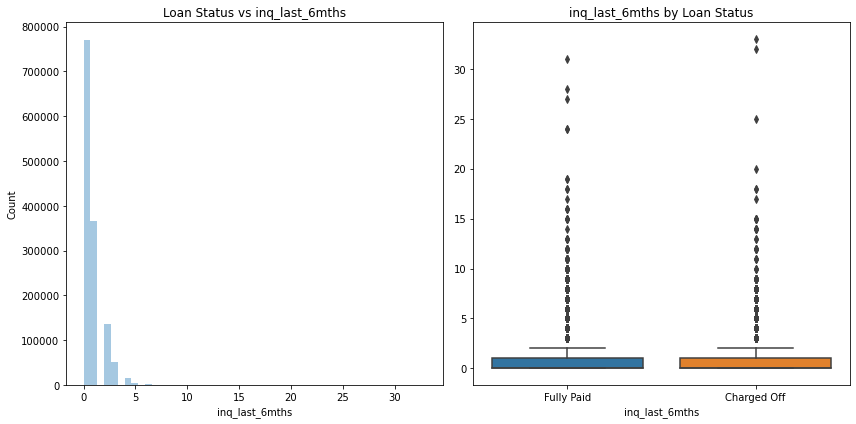

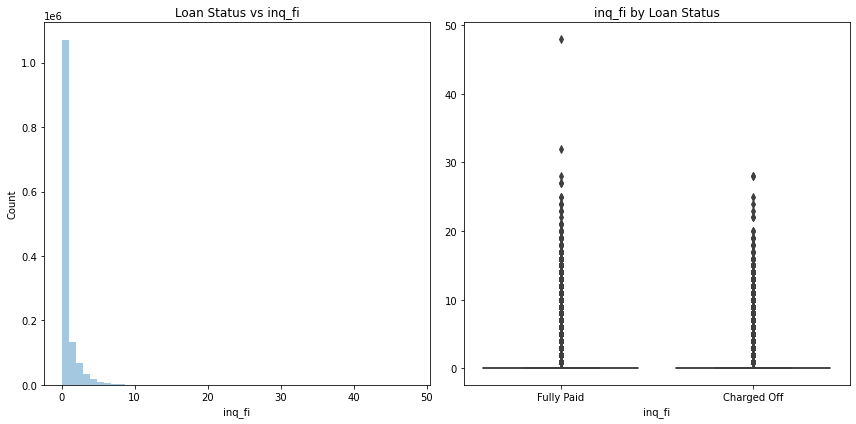

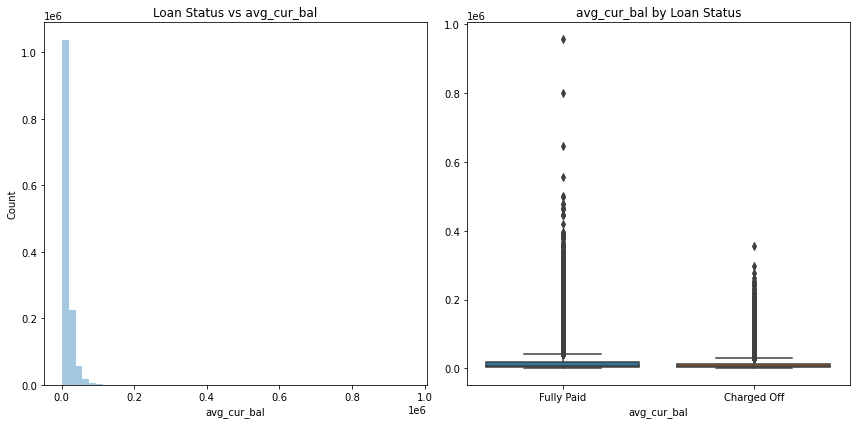

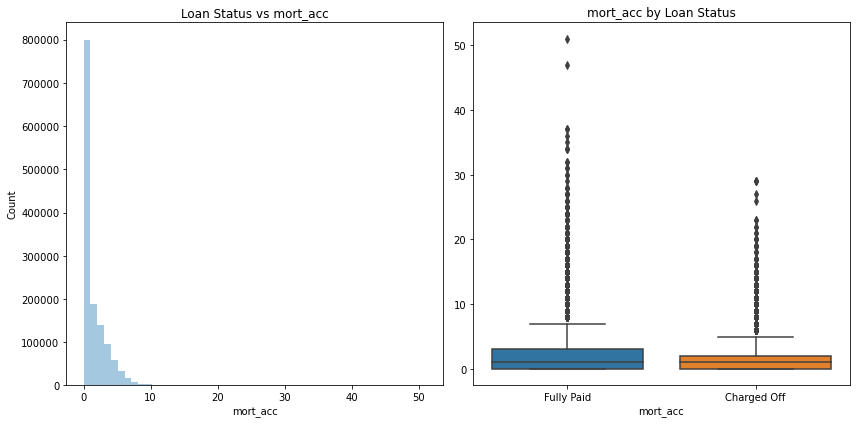

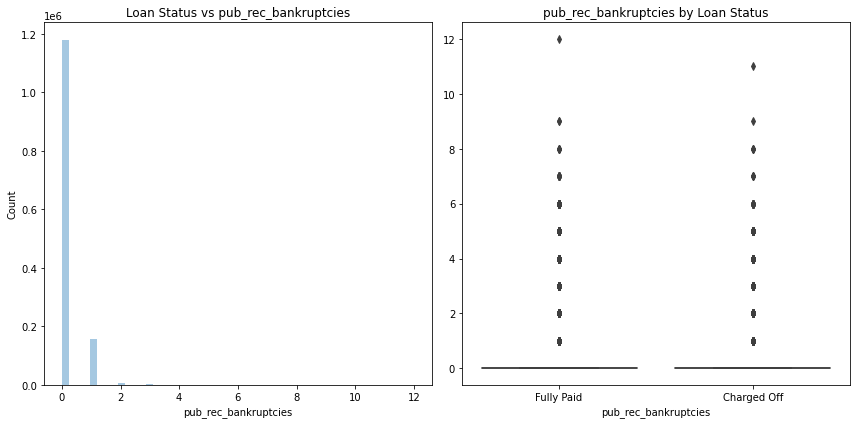

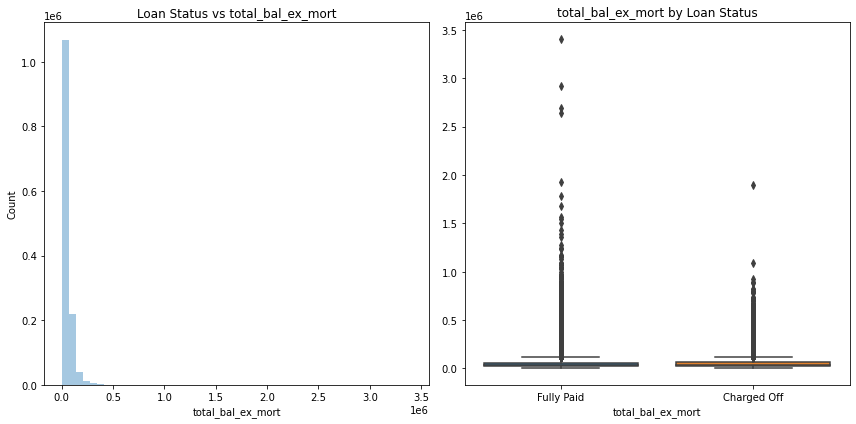

In [28]:
for v in numeric_var:
    numeric_plot(v)

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\si

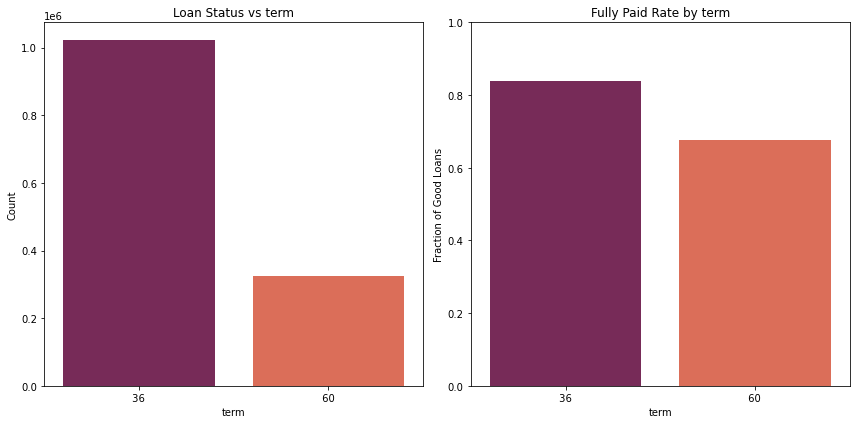

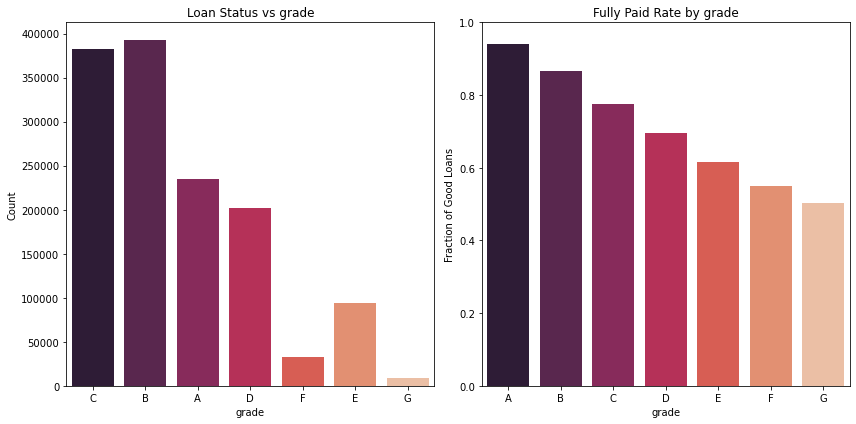

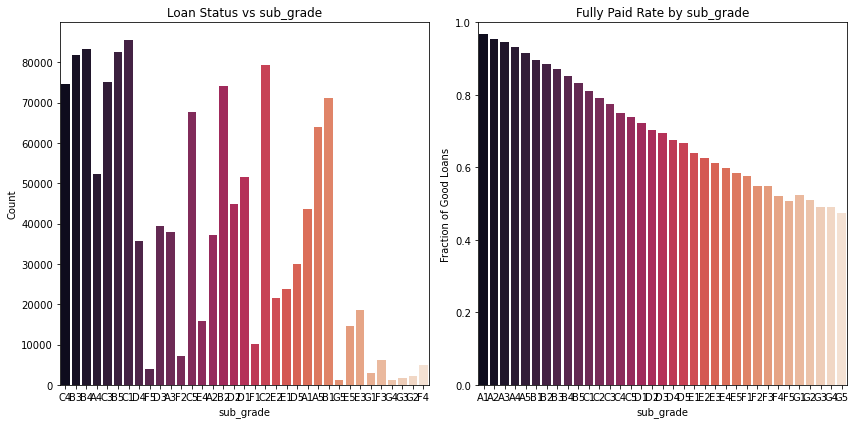

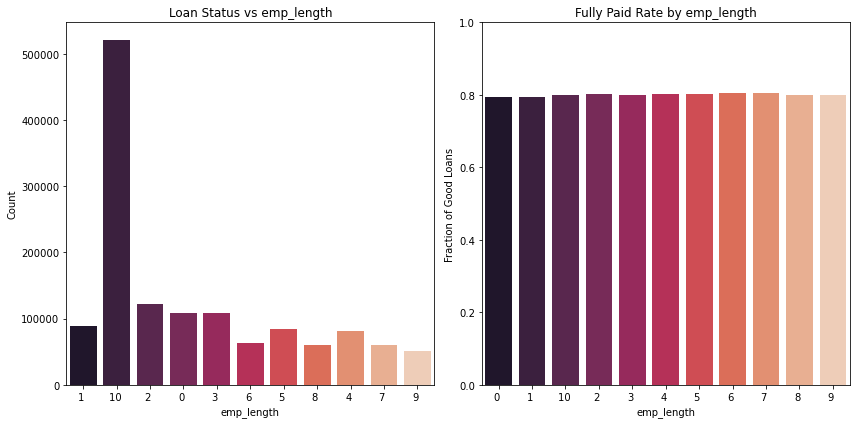

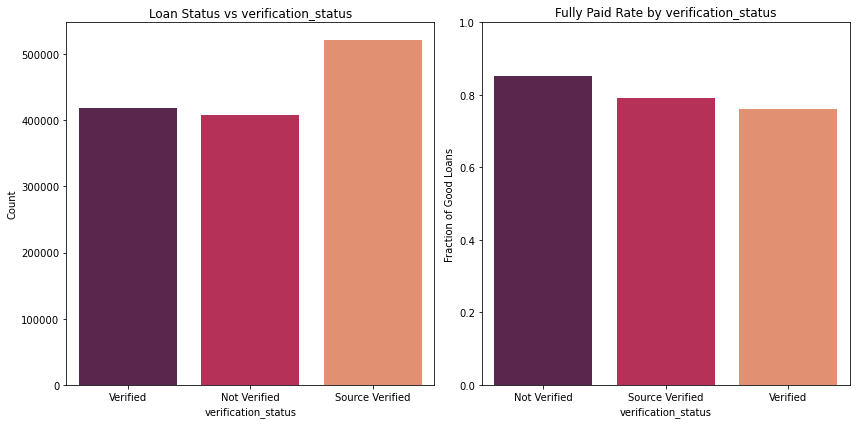

In [38]:
for v in ordinal_var:
    categorical_plot(v)

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


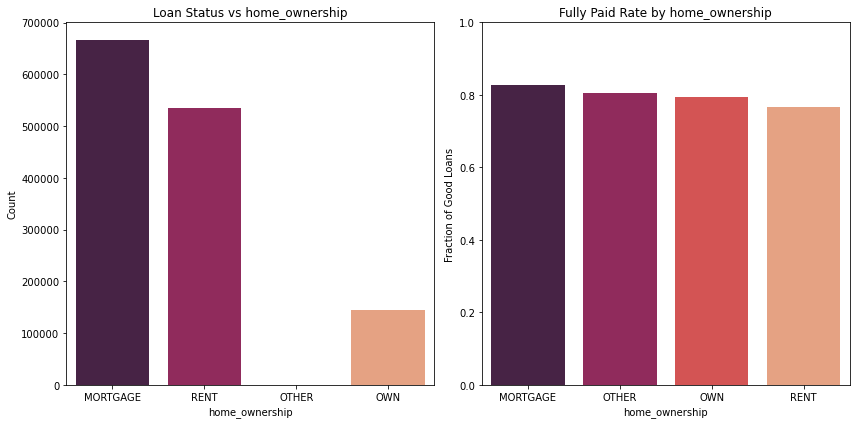

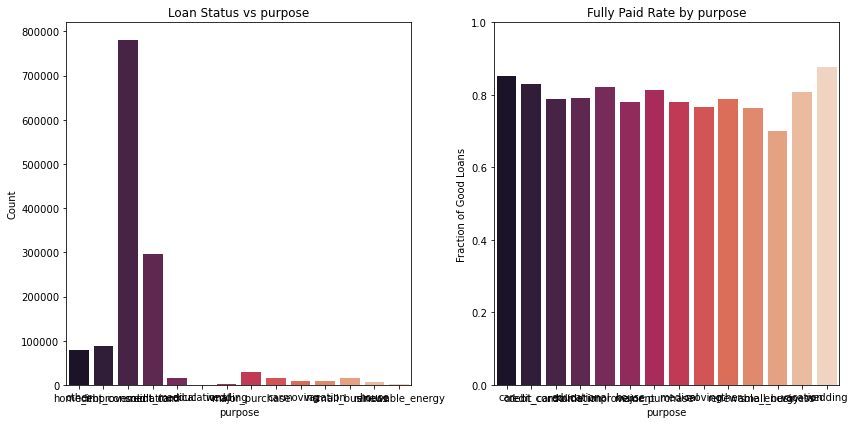

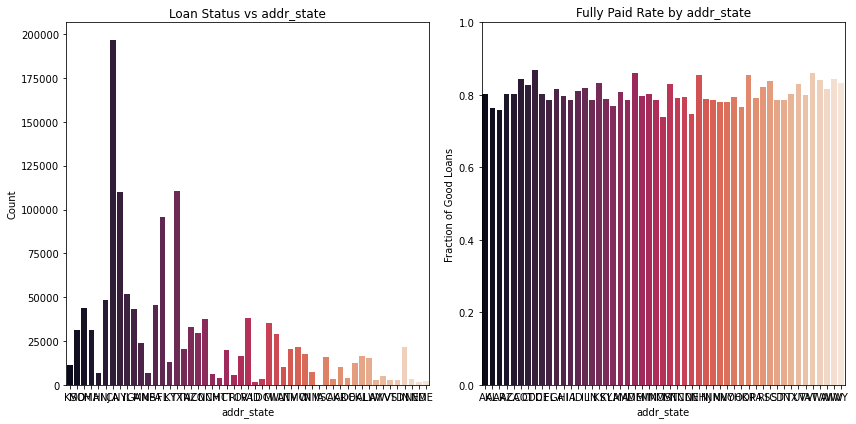

In [82]:
# nominal_var = ['home_ownership','purpose', 'title', 'zip_code', 'addr_state']

categorical_plot('home_ownership')
categorical_plot('purpose')
# categorical_plot('title')
categorical_plot('addr_state')

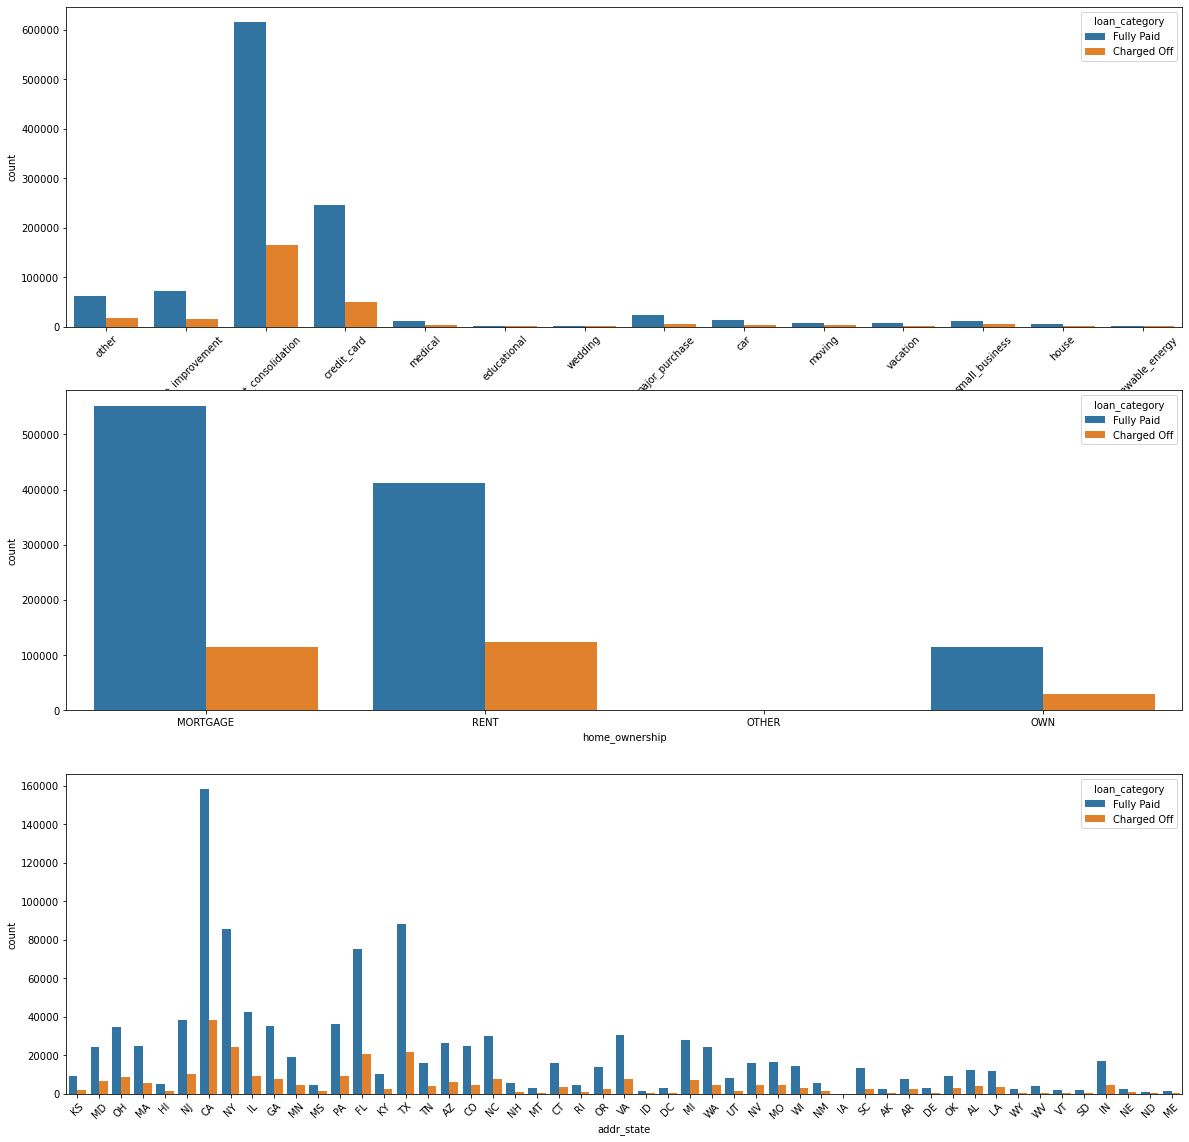

In [83]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 1)
purpose = sns.countplot(x='purpose', data=a_lc, hue='loan_category')
purpose.set_xticklabels(purpose.get_xticklabels(), rotation=45);

plt.subplot(3, 1, 2)
sns.countplot(x='home_ownership', data=a_lc, hue='loan_category')

plt.subplot(3, 1, 3)
state = sns.countplot(x='addr_state', data=a_lc, hue='loan_category')
state.set_xticklabels(state.get_xticklabels(), rotation=45);

# sns.countplot(x='title', data=a_lc, hue='loan_category')




### Data Cleaning

In [41]:
a_lc.issue_d

1653655    Apr-2008
1650776    Apr-2008
1650777    Apr-2008
1650778    Apr-2008
1650779    Apr-2008
             ...   
764308     Sep-2018
764315     Sep-2018
764343     Sep-2018
764796     Sep-2018
782520     Sep-2018
Name: issue_d, Length: 1348099, dtype: object

In [27]:
import datetime as dt
def make_dateval(s):
    return dt.datetime.strptime(s[-4:]+s[:3]+'01', '%Y%b%d')
a_lc.issue_d = a_lc.issue_d.apply(make_dateval)
a_lc.earliest_cr_line = a_lc.earliest_cr_line.apply(make_dateval)
a_lc['year'] = a_lc.issue_d.apply(lambda x: x.year)
a_lc['cred_year'] = a_lc.earliest_cr_line.apply(lambda x: x.year)
a_lc['cred_length'] = a_lc['year'] - a_lc['cred_year']


In [85]:
yearly_count = a_lc.groupby('year')['loan_category'].count().reset_index()
yearly_count = yearly_count.rename(columns={'loan_category': 'counts'})
yearly_count['ratio'] = yearly_count['counts'] / len(a_lc)
yearly_count

,year,counts,ratio
0,2007,603,0.000447
1,2008,2393,0.001775
2,2009,5281,0.003917
3,2010,12537,0.009300
4,2011,21721,0.016112
5,2012,53367,0.039587
6,2013,134804,0.099996
7,2014,223103,0.165495
8,2015,375546,0.278574
9,2016,293105,0.217421


Text(0, 0.5, 'Ratio')

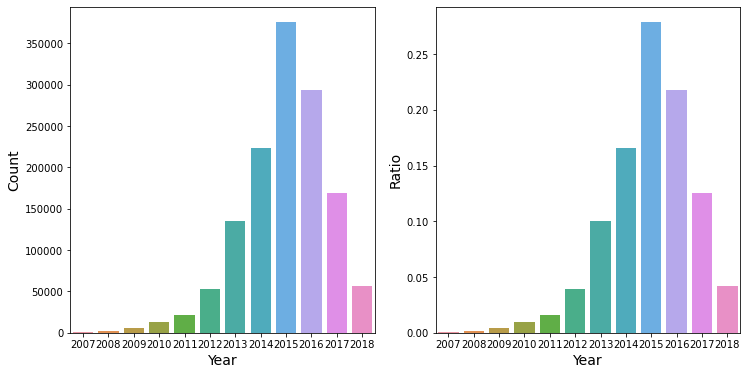

In [21]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='year', data=a_lc, ax=ax1)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)


sns.barplot(x='year', y = 'ratio', data=yearly_count, ax=ax2)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Ratio', fontsize=14)

# plt.show()

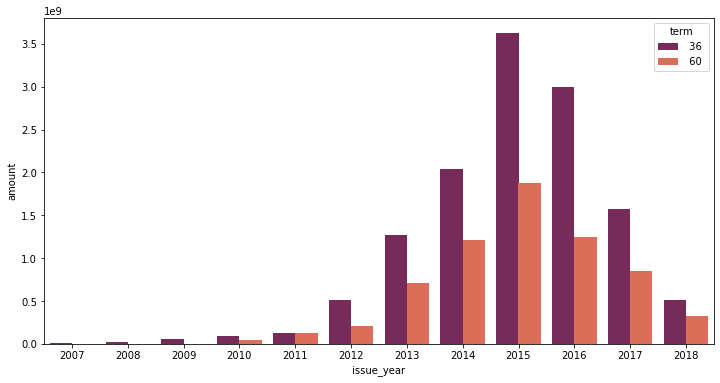

In [28]:
# Plot for Issue year vs Loan Amount
# making issue date as date time

a_lc['issue_d'] = pd.to_datetime(a_lc['issue_d'])
a_lc = a_lc[pd.notnull(a_lc['issue_d'])]
a_lc['issue_year'] = a_lc['issue_d'].dt.year
yamnt = pd.DataFrame({'amount' : a_lc.groupby(['issue_year', 'term']).sum()['loan_amnt']}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="issue_year", y="amount",
             hue="term", palette="rocket", linewidth=2.5,
             data=yamnt)

Text(0.5, 1.0, 'Interest Rate Distribuition')

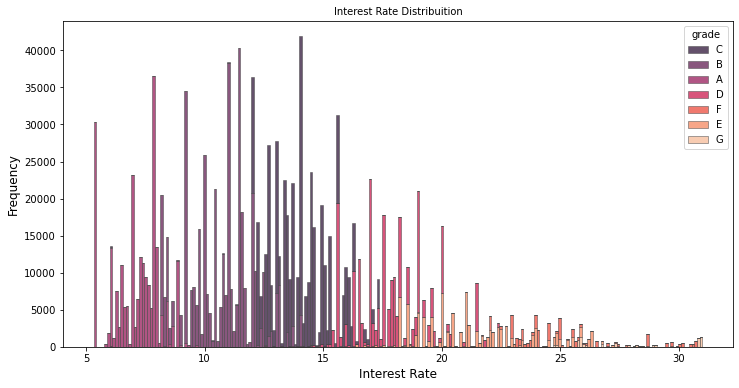

In [202]:
# Frequency distribution of Interest Rate
plt.figure(figsize=(12,6))
g = sns.histplot(a_lc, x="int_rate",hue='grade',
    multiple="stack",
    palette="rocket",
    edgecolor=".3",linewidth=.5
    )
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Interest Rate Distribuition", fontsize=10)

In [31]:
# Creating target feature loan_class to check Good and Bad Loan. Good is 0 and bad is 1
a_lc["loan_class"] = np.where((a_lc.loan_category == 'Fully Paid'), 0, 1)

In [32]:
a_lc.loan_class.value_counts()

0    1078739
1     269360
Name: loan_class, dtype: int64

In [29]:
a_lc.loan_status.value_counts()

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [33]:
# Total Loan Amount Cost
cost = a_lc.groupby('loan_class').loan_amnt.sum().sort_values(ascending=False)

# Showing the amounts in $bn 
print("Fully paid loans: $"+str(round(cost[0]/1e9,1))+"bn")
print("Charged off loans: $"+str(round(cost[1]/1e9,1))+"bn")

# What is this as a percentage of the charge off rate, i.e. the cost of risk (CoR)? 
default_cost = cost[1]/a_lc['loan_amnt'].sum()
print("cost of default is "+str(round(default_cost*100,1))+"%")

Fully paid loans: $15.2bn
Charged off loans: $4.2bn
cost of default is 21.6%


In [34]:
# Remove these columns based on data analysis
a_lc.drop(['grade','issue_d', 'loan_status', 'zip_code', 'earliest_cr_line', 'cred_year', 'title'], axis=1, inplace=True)

In [ ]:
state_count = a_lc.groupby(['addr_state']).count().reset_index()
state_count = state_count[['addr_state','loan_class']]
state_count.rename(columns={'loan_class': 'counts'})

unique_count = a_lc.groupby(['addr_state','loan_class']).count().reset_index()
unique_count = unique_count[['addr_state','loan_class', 'id']]
m = pd.merge(unique_count, state_count, on="addr_state", how = "left")
m.rename(columns={'loan_class_y': 'total'})

m

In [ ]:
m['ratio'] = m['id']/m['loan_class_y']
m = m[['addr_state', 'loan_class_x', 'ratio']]
m.set_index('addr_state')

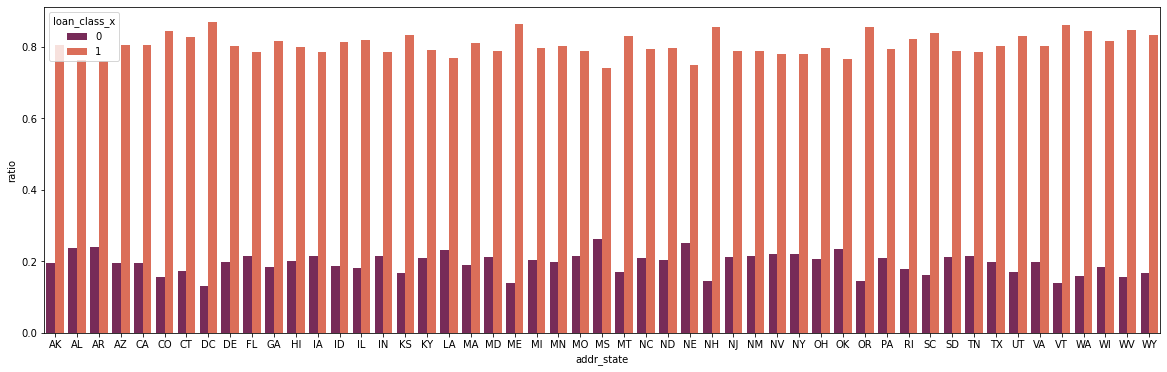

In [128]:
plt.figure(figsize=(20,6))
sns.barplot(x="addr_state", y="ratio",
             hue="loan_class_x", palette="rocket", linewidth=2.5,
             data=m) #drop state

### Encoding

In [35]:
print([column for column in a_lc.columns if a_lc[column].dtype == 'object'])

['id', 'term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'loan_category']


In [36]:
a_lc.drop(['id','addr_state'], axis =1, inplace=True)

In [37]:
sub_grades = sorted(a_lc.sub_grade.unique())
grades = dict((i,j) for i,j in enumerate(sub_grades, start=1))
grades = {grades[k]:k for k in grades}

# sub_grades_dict = {x:sub_grades.index(x)+1 for x in sub_grades} 
# sub_grades_dict

In [38]:
a_lc_wo = a_lc.copy()

In [39]:
a_lc['sub_grade'] = a_lc['sub_grade'].map(grades)

In [40]:
verification_status = {'Not Verified':0, 'Source Verified':1, 'Verified':2}
a_lc['verification_status'] = a_lc['verification_status'].map(verification_status)


In [41]:
# Dummy variable created for the following features
categorical = ['home_ownership', 'purpose']
a_lc =pd.get_dummies(a_lc, columns=categorical, drop_first=True)


In [42]:
print([column for column in a_lc.columns if a_lc[column].dtype == 'object'])

['term', 'emp_length', 'loan_category']


In [43]:
a_lc[['term', 'emp_length']] = a_lc[['term', 'emp_length']].apply(pd.to_numeric)

In [44]:
a_lc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'tot_coll_amt',
       'tot_cur_bal', 'inq_fi', 'avg_cur_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'total_bal_ex_mort', 'loan_category', 'year',
       'cred_length', 'issue_year', 'loan_class', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

## Feature Engineering

In [45]:
a_lc['term_amnt'] = a_lc['loan_amnt']*a_lc['term'] #in order to calculate weighted average. longer term => takes longer to pay
weighted_average = a_lc['term_amnt'].sum()/a_lc['loan_amnt'].sum()

print(f'Average term: {round(a_lc.term.mean(),2)} months')
print(f'Weighted average term amount: {str(round(weighted_average,2))} months')

Average term: 41.78 months
Weighted average term amount: 44.15 months


In [46]:
a_lc['int_amnt'] = a_lc['int_rate']*a_lc['loan_amnt']
cumulative_avg_int_rate = a_lc['int_amnt'].sum()/a_lc['loan_amnt'].sum()

print(f'Average interest rate: {str(round(a_lc.int_rate.mean(),2))}%')
print(f'Weighted av. rate: {str(round(cumulative_avg_int_rate,2))}%')

Average interest rate: 13.24%
Weighted av. rate: 13.65%


In [65]:
a_lc.drop('loan_category', axis=1,inplace=True)


In [ ]:
a_lc

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

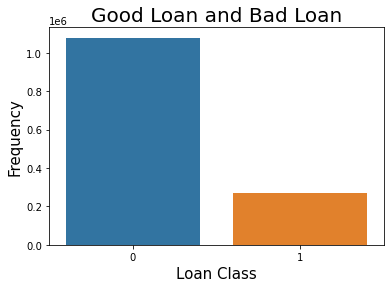

In [48]:
# Countplot of Good Loans and Bad Loans
g= sns.countplot(a_lc["loan_class"])
g.set_xticklabels(g.get_xticklabels(),rotation=0)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Class", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

## Train_test_ split

In [67]:
loans = a_lc.copy()

In [ ]:
#split loans into train test groups based on year. Define X_train/test, Y_train/test

loans_train = loans[loans['year'] < 2018]
loans_test = loans[loans['year'] == 2018]

X_train = loans_train.loc[:, loans_train.columns != "loan_class"]
Y_train = loans_train["loan_class"]

X_test = loans_test.loc[:, loans_test.columns != "loan_class"]
Y_test = loans_test["loan_class"]

X_train.drop('year', axis =1)
X_test.drop('year', axis =1)

In [69]:
X_train.shape, X_test.shape

((1291781, 46), (56318, 46))

## Performance Metric Calculation

In [70]:
# Assuming cost of funding is 3%
CoF =3

In [71]:
#gives back necessary financial metrics of loan data for comparison
def return_stats(df, title):
    """
    Function to return all of the financial returns data for comparing the models
    returns: the total book return on equity in %
    """
        
    weighted_term = df['term_amnt'].sum() / df['loan_amnt'].sum()
    weighted_interest = df['int_amnt'].sum() / df['loan_amnt'].sum()
    charge_off_rate = df['loan_class'].value_counts(normalize=True)
    charge_off_amount = df.groupby('loan_class').loan_amnt.sum() #dollar amount of each loan_class
    total_CoR = charge_off_amount[1] / df['loan_amnt'].sum() #dollar amount of default loans

    loans_approved = df.loan_amnt.sum() #total dollar amount of loans 
    loans_charged_off = charge_off_amount[1] #total dollar amount of default loans

    # And therefore, the ROI:
    loans_returned = loans_approved - loans_charged_off #total loan amount paid back
    interest_earned = loans_returned * (weighted_interest) / 100 * (weighted_term / 12) #interest amount per year 
    interest_paid = loans_approved * CoF / 100 * (weighted_term / 12) #CoF (cost of funds)
    profit = interest_earned - interest_paid - loans_charged_off
    ROI = profit / loans_approved

    
    print(title)
    print(f'Weighted average term amount: {str(round(weighted_term,2))} months')
    print(f'Weighted av. rate: {str(round(weighted_interest,2))}%')
    print(f'Total cost of risk due to default: {str(round(total_CoR * 100, 2))}%')
    print(f'Total loan book is: $ {str(round(loans_approved / 1e6))} M')
    print(f'Interest earned is: $ {str(round(interest_earned / 1e6, 0))} M')
    print(f'Interest paid is: $ {str(round(interest_paid / 1e6, 0))} M')
    print(f'Profit is: $ {str(round(profit / 1e6, 0))} M')
    print(f'Total book ROI: {str(round(ROI * 100, 2))} %')

    return weighted_term, weighted_interest, charge_off_rate, charge_off_amount, total_CoR, ROI

In [72]:
# High level Performance metrics of all Loans
weighted_term, weighted_interest, charge_off_rate, charge_off_amount, total_CoR, ROI = return_stats(loans, 'Total book')

Total book
Weighted average term amount: 44.15 months
Weighted av. rate: 13.65%
Total cost of risk due to default: 21.56%
Total loan book is: $ 19425 M
Interest earned is: $ 7651.0 M
Interest paid is: $ 2144.0 M
Profit is: $ 1319.0 M
Total book ROI: 6.79 %


In [73]:
# High level Performance metrics of train data
weighted_term, weighted_interest, charge_off_rate, charge_off_amount, total_CoR, ROI = return_stats(loans_train, 'Total book')

Total book
Weighted average term amount: 44.09 months
Weighted av. rate: 13.65%
Total cost of risk due to default: 21.72%
Total loan book is: $ 18587 M
Interest earned is: $ 7295.0 M
Interest paid is: $ 2049.0 M
Profit is: $ 1210.0 M
Total book ROI: 6.51 %


In [74]:
# High level Performance metrics of test data
weighted_term_test, weighted_interest_test, charge_off_rate_test, charge_off_amount_test, total_CoR_test, ROI_test = return_stats(loans_test, 'Test set loans')


Test set loans
Weighted average term amount: 45.43 months
Weighted av. rate: 13.71%
Total cost of risk due to default: 18.03%
Total loan book is: $ 838 M
Interest earned is: $ 356.0 M
Interest paid is: $ 95.0 M
Profit is: $ 110.0 M
Total book ROI: 13.14 %


In [75]:
def model_performance(y_pred, column, total_CoR_test, df, CoF):
    """
    Compares model prediction metrics against the metrics of the test set loans as well as CoR
    y_pred - the model prediction of loan class
    Returns interest rate, cost of risk and ROI of the book in % 
    """
    # Adding new column with the predicted charge off rate
    df[column] = y_pred
    y_test_paid = df.loc[df[column].isin([0])]
    performance = y_test_paid.groupby('loan_class').loan_amnt.sum()

    # CoR is the proportion that was charged off:
    loans_approved = performance.sum()
    loans_charged_off = performance[1]
    CoR = loans_charged_off / loans_approved

    saving = df['loan_amnt'].sum() * (total_CoR_test - CoR)

    weighted_interest = y_test_paid['int_amnt'].sum() / y_test_paid['loan_amnt'].sum()
    weighted_term = y_test_paid['term_amnt'].sum() / y_test_paid['loan_amnt'].sum()

    # ROI
    loans_returned = loans_approved - loans_charged_off
    interest_earned = loans_returned * weighted_interest / 100 * (weighted_term / 12)
    interest_paid = loans_approved * CoF / 100 * (weighted_term / 12)
    profit = interest_earned - interest_paid - loans_charged_off
    ROI = profit / loans_approved

    print('Total loans approved = $' + str(round(loans_approved / 1e9, 3)) + 'bn')
    print('Total loans charged off = $' + str(round(loans_charged_off / 1e9, 3)) + 'bn')
    print('Modelled cost of risk is: ' + str(round(CoR * 100, 2)) + "%")
    print("Total saving = $" + str(round(saving / 1e6, 1)) + "m\n")
    print('Weighted average interest rate: ' + str(round(weighted_interest, 2)) + "%")
    print('Weighted average term: ' + str(round(weighted_term, 2)) + " months\n")
    print('Interest earned: $' + str(round(interest_earned / 1e6, 0)) + "m")
    print('Interest paid: $' + str(round(interest_paid / 1e6, 0)) + "m")
    print('Profit is: $' + str(round(profit / 1e6, 0)) + "m")
    print('Return on investment is: ' + str(round(ROI * 100, 2)) + "%")

    return weighted_interest, CoR, ROI

### Machine Learning - No tuning

In [77]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     47444
           1       0.37      0.13      0.20      8874

    accuracy                           0.83     56318
   macro avg       0.61      0.55      0.55     56318
weighted avg       0.78      0.83      0.79     56318

Accuracy of the model is:  0.8278703078944565


Text(83.40000000000006, 0.5, 'True')

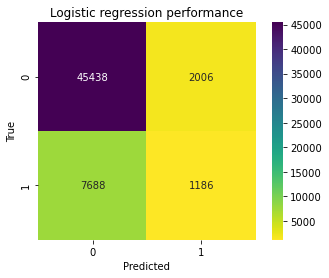

In [79]:
# Applying Logistic Regression without class weight/sampling
logistic= LogisticRegression()
temp=logistic.fit(X_train, Y_train)

Y_pred= logistic.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))


ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('Logistic regression performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
#Precision: out of my predicted values how many are actually that predicted value. predict fewer false positives. opportunity cost miss
#Recall: out of all values, how many are actually that predicted value.predict fewer false negatives. minimize this 


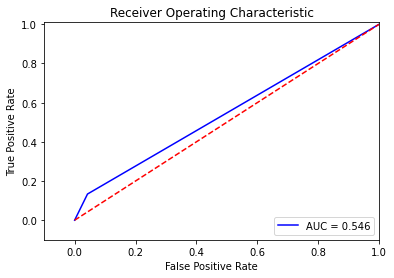

In [80]:
# ROC-AUC for logistic  classification
#tmp = logistic.fit(X_train, Y_train.ravel())
#Y_pred = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
# Apply performance metrics function
logistic_int_rate, logistic_CoR, logistic_ROI = model_performance(Y_pred,'logistic model (no tuning)', total_CoR_test, loans_test, CoF)




Total loans approved = $0.774bn
Total loans charged off = $0.127bn
Modelled cost of risk is: 16.41%
Total saving = $13.6m

Weighted average interest rate: 12.88%
Weighted average term: 44.37 months

Interest earned: $308.0m
Interest paid: $86.0m
Profit is: $95.0m
Return on investment is: 12.3%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


C:\Users\Chait\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     47444
           1       0.47      0.12      0.18      8874

    accuracy                           0.84     56318
   macro avg       0.66      0.55      0.55     56318
weighted avg       0.79      0.84      0.80     56318

Accuracy of the model is:  0.8399090876806705


Text(83.40000000000006, 0.5, 'True')

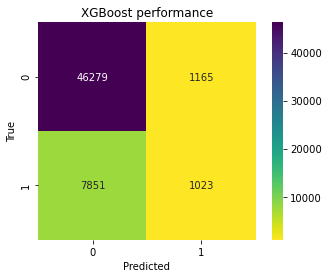

In [82]:
# Apply XGBoosting model on train data
import xgboost as xgb
xg = xgb.XGBClassifier()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train,Y_train)
Y_pred = xg.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('XGBoost performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


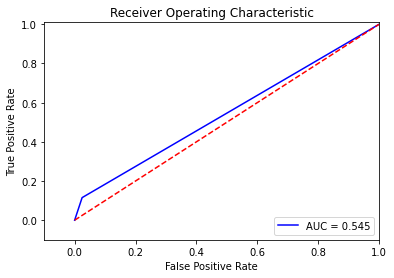

In [83]:
# ROC-AUC for XGBoost
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
# Apply performance metrics function on XGBoost
xg_int_rate, xg_CoR, xg_ROI = model_performance(Y_pred,'XGBoost (no tuning)', total_CoR_test, loans_test, CoF)




Total loans approved = $0.791bn
Total loans charged off = $0.129bn
Modelled cost of risk is: 16.3%
Total saving = $14.5m

Weighted average interest rate: 13.17%
Weighted average term: 44.74 months

Interest earned: $325.0m
Interest paid: $88.0m
Profit is: $108.0m
Return on investment is: 13.6%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


0:	learn: 0.6433231	total: 549ms	remaining: 9m 8s
1:	learn: 0.6042799	total: 905ms	remaining: 7m 31s
2:	learn: 0.5732422	total: 1.29s	remaining: 7m 10s
3:	learn: 0.5488535	total: 1.67s	remaining: 6m 56s
4:	learn: 0.5298113	total: 2.03s	remaining: 6m 44s
5:	learn: 0.5150781	total: 2.38s	remaining: 6m 35s
6:	learn: 0.5033597	total: 2.75s	remaining: 6m 30s
7:	learn: 0.4943351	total: 3.11s	remaining: 6m 25s
8:	learn: 0.4871599	total: 3.45s	remaining: 6m 20s
9:	learn: 0.4811325	total: 3.87s	remaining: 6m 22s
10:	learn: 0.4764226	total: 4.2s	remaining: 6m 17s
11:	learn: 0.4723692	total: 4.6s	remaining: 6m 18s
12:	learn: 0.4693705	total: 4.95s	remaining: 6m 15s
13:	learn: 0.4666454	total: 5.31s	remaining: 6m 14s
14:	learn: 0.4645229	total: 5.67s	remaining: 6m 12s
15:	learn: 0.4626146	total: 6.06s	remaining: 6m 12s
16:	learn: 0.4611002	total: 6.42s	remaining: 6m 11s
17:	learn: 0.4598275	total: 6.79s	remaining: 6m 10s
18:	learn: 0.4588195	total: 7.16s	remaining: 6m 9s
19:	learn: 0.4579478	total

158:	learn: 0.4479801	total: 1m 1s	remaining: 5m 24s
159:	learn: 0.4479520	total: 1m 1s	remaining: 5m 23s
160:	learn: 0.4479258	total: 1m 2s	remaining: 5m 23s
161:	learn: 0.4479075	total: 1m 2s	remaining: 5m 22s
162:	learn: 0.4478799	total: 1m 2s	remaining: 5m 22s
163:	learn: 0.4478662	total: 1m 3s	remaining: 5m 21s
164:	learn: 0.4478454	total: 1m 3s	remaining: 5m 20s
165:	learn: 0.4478262	total: 1m 3s	remaining: 5m 19s
166:	learn: 0.4478016	total: 1m 4s	remaining: 5m 19s
167:	learn: 0.4477845	total: 1m 4s	remaining: 5m 18s
168:	learn: 0.4477661	total: 1m 4s	remaining: 5m 18s
169:	learn: 0.4477461	total: 1m 5s	remaining: 5m 17s
170:	learn: 0.4477225	total: 1m 5s	remaining: 5m 17s
171:	learn: 0.4477023	total: 1m 5s	remaining: 5m 16s
172:	learn: 0.4476804	total: 1m 6s	remaining: 5m 16s
173:	learn: 0.4476618	total: 1m 6s	remaining: 5m 15s
174:	learn: 0.4476440	total: 1m 6s	remaining: 5m 15s
175:	learn: 0.4476223	total: 1m 7s	remaining: 5m 14s
176:	learn: 0.4476055	total: 1m 7s	remaining: 

311:	learn: 0.4454679	total: 1m 57s	remaining: 4m 19s
312:	learn: 0.4454524	total: 1m 58s	remaining: 4m 19s
313:	learn: 0.4454384	total: 1m 58s	remaining: 4m 19s
314:	learn: 0.4454294	total: 1m 59s	remaining: 4m 19s
315:	learn: 0.4454184	total: 1m 59s	remaining: 4m 19s
316:	learn: 0.4454020	total: 2m	remaining: 4m 18s
317:	learn: 0.4453883	total: 2m	remaining: 4m 18s
318:	learn: 0.4453774	total: 2m	remaining: 4m 17s
319:	learn: 0.4453624	total: 2m 1s	remaining: 4m 17s
320:	learn: 0.4453516	total: 2m 1s	remaining: 4m 17s
321:	learn: 0.4453399	total: 2m 2s	remaining: 4m 17s
322:	learn: 0.4453307	total: 2m 2s	remaining: 4m 17s
323:	learn: 0.4453185	total: 2m 3s	remaining: 4m 16s
324:	learn: 0.4453066	total: 2m 3s	remaining: 4m 16s
325:	learn: 0.4452937	total: 2m 4s	remaining: 4m 16s
326:	learn: 0.4452776	total: 2m 4s	remaining: 4m 16s
327:	learn: 0.4452634	total: 2m 5s	remaining: 4m 16s
328:	learn: 0.4452524	total: 2m 5s	remaining: 4m 15s
329:	learn: 0.4452405	total: 2m 6s	remaining: 4m 1

465:	learn: 0.4437830	total: 3m 2s	remaining: 3m 28s
466:	learn: 0.4437764	total: 3m 2s	remaining: 3m 28s
467:	learn: 0.4437667	total: 3m 3s	remaining: 3m 28s
468:	learn: 0.4437559	total: 3m 3s	remaining: 3m 27s
469:	learn: 0.4437488	total: 3m 3s	remaining: 3m 27s
470:	learn: 0.4437403	total: 3m 4s	remaining: 3m 26s
471:	learn: 0.4437336	total: 3m 4s	remaining: 3m 26s
472:	learn: 0.4437238	total: 3m 4s	remaining: 3m 26s
473:	learn: 0.4437157	total: 3m 5s	remaining: 3m 25s
474:	learn: 0.4437077	total: 3m 5s	remaining: 3m 25s
475:	learn: 0.4436978	total: 3m 6s	remaining: 3m 24s
476:	learn: 0.4436895	total: 3m 6s	remaining: 3m 24s
477:	learn: 0.4436809	total: 3m 7s	remaining: 3m 24s
478:	learn: 0.4436743	total: 3m 7s	remaining: 3m 23s
479:	learn: 0.4436683	total: 3m 7s	remaining: 3m 23s
480:	learn: 0.4436569	total: 3m 8s	remaining: 3m 23s
481:	learn: 0.4436478	total: 3m 8s	remaining: 3m 22s
482:	learn: 0.4436398	total: 3m 9s	remaining: 3m 22s
483:	learn: 0.4436339	total: 3m 9s	remaining: 

618:	learn: 0.4424701	total: 4m 3s	remaining: 2m 29s
619:	learn: 0.4424588	total: 4m 3s	remaining: 2m 29s
620:	learn: 0.4424522	total: 4m 4s	remaining: 2m 28s
621:	learn: 0.4424451	total: 4m 4s	remaining: 2m 28s
622:	learn: 0.4424345	total: 4m 4s	remaining: 2m 28s
623:	learn: 0.4424289	total: 4m 5s	remaining: 2m 27s
624:	learn: 0.4424216	total: 4m 5s	remaining: 2m 27s
625:	learn: 0.4424138	total: 4m 5s	remaining: 2m 26s
626:	learn: 0.4424048	total: 4m 6s	remaining: 2m 26s
627:	learn: 0.4423981	total: 4m 6s	remaining: 2m 26s
628:	learn: 0.4423904	total: 4m 7s	remaining: 2m 25s
629:	learn: 0.4423811	total: 4m 7s	remaining: 2m 25s
630:	learn: 0.4423714	total: 4m 7s	remaining: 2m 24s
631:	learn: 0.4423622	total: 4m 8s	remaining: 2m 24s
632:	learn: 0.4423535	total: 4m 8s	remaining: 2m 24s
633:	learn: 0.4423456	total: 4m 8s	remaining: 2m 23s
634:	learn: 0.4423360	total: 4m 9s	remaining: 2m 23s
635:	learn: 0.4423264	total: 4m 9s	remaining: 2m 22s
636:	learn: 0.4423165	total: 4m 9s	remaining: 

771:	learn: 0.4413141	total: 5m	remaining: 1m 28s
772:	learn: 0.4413058	total: 5m 1s	remaining: 1m 28s
773:	learn: 0.4412958	total: 5m 1s	remaining: 1m 28s
774:	learn: 0.4412895	total: 5m 2s	remaining: 1m 27s
775:	learn: 0.4412770	total: 5m 2s	remaining: 1m 27s
776:	learn: 0.4412717	total: 5m 2s	remaining: 1m 26s
777:	learn: 0.4412676	total: 5m 3s	remaining: 1m 26s
778:	learn: 0.4412581	total: 5m 3s	remaining: 1m 26s
779:	learn: 0.4412506	total: 5m 3s	remaining: 1m 25s
780:	learn: 0.4412416	total: 5m 4s	remaining: 1m 25s
781:	learn: 0.4412330	total: 5m 4s	remaining: 1m 24s
782:	learn: 0.4412258	total: 5m 4s	remaining: 1m 24s
783:	learn: 0.4412167	total: 5m 5s	remaining: 1m 24s
784:	learn: 0.4412073	total: 5m 5s	remaining: 1m 23s
785:	learn: 0.4412009	total: 5m 5s	remaining: 1m 23s
786:	learn: 0.4411936	total: 5m 6s	remaining: 1m 22s
787:	learn: 0.4411883	total: 5m 6s	remaining: 1m 22s
788:	learn: 0.4411811	total: 5m 6s	remaining: 1m 22s
789:	learn: 0.4411721	total: 5m 7s	remaining: 1m 

926:	learn: 0.4402033	total: 6m 2s	remaining: 28.5s
927:	learn: 0.4401972	total: 6m 2s	remaining: 28.1s
928:	learn: 0.4401919	total: 6m 3s	remaining: 27.7s
929:	learn: 0.4401839	total: 6m 3s	remaining: 27.4s
930:	learn: 0.4401783	total: 6m 3s	remaining: 27s
931:	learn: 0.4401706	total: 6m 4s	remaining: 26.6s
932:	learn: 0.4401632	total: 6m 4s	remaining: 26.2s
933:	learn: 0.4401551	total: 6m 4s	remaining: 25.8s
934:	learn: 0.4401480	total: 6m 5s	remaining: 25.4s
935:	learn: 0.4401441	total: 6m 5s	remaining: 25s
936:	learn: 0.4401365	total: 6m 5s	remaining: 24.6s
937:	learn: 0.4401309	total: 6m 6s	remaining: 24.2s
938:	learn: 0.4401257	total: 6m 6s	remaining: 23.8s
939:	learn: 0.4401163	total: 6m 6s	remaining: 23.4s
940:	learn: 0.4401076	total: 6m 7s	remaining: 23s
941:	learn: 0.4400994	total: 6m 7s	remaining: 22.6s
942:	learn: 0.4400931	total: 6m 8s	remaining: 22.2s
943:	learn: 0.4400864	total: 6m 8s	remaining: 21.9s
944:	learn: 0.4400824	total: 6m 8s	remaining: 21.5s
945:	learn: 0.4400

Text(83.40000000000006, 0.5, 'True')

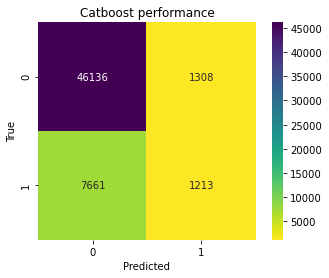

In [85]:
#Apply Catboost algorithm
from catboost import CatBoostClassifier


clf = CatBoostClassifier(
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('Catboost performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


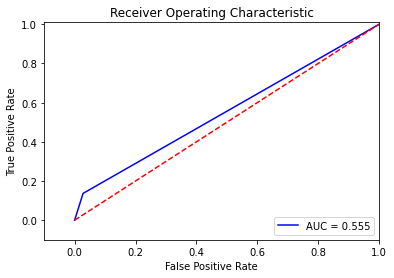

In [86]:
# ROC-AUC for XGBoost
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
# Apply performance metrics function on CatBoost
clf_int_rate, clf_CoR, clf_ROI = model_performance(Y_pred,'CatBoost', total_CoR_test, loans_test, CoF)




Total loans approved = $0.783bn
Total loans charged off = $0.124bn
Modelled cost of risk is: 15.89%
Total saving = $18.0m

Weighted average interest rate: 13.18%
Weighted average term: 44.72 months

Interest earned: $323.0m
Interest paid: $88.0m
Profit is: $111.0m
Return on investment is: 14.23%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini')
rf.fit(X_train, Y_train)
Y_Pred= rf.predict(X_test)
# rf_probs = rf.predict_proba(Y_test)[:, 1]


print(classification_report(Y_test, Y_Pred))
#print(confusion_matrix(Y_test, rf_predictions))
conf_matrix = confusion_matrix(Y_test, Y_Pred)

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_Pred,Y_test))
print("Precision score: {}".format(precision_score(Y_test,Y_Pred)))
print("Recall score: {}".format(recall_score(Y_test,Y_Pred)))

# roc_auc_score(Y_test, rf_probs)

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('RandomForest performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


              precision    recall  f1-score   support

           0       0.85      0.98      0.91     47444
           1       0.46      0.10      0.17      8874

    accuracy                           0.84     56318
   macro avg       0.65      0.54      0.54     56318
weighted avg       0.79      0.84      0.79     56318

Accuracy of the model is:  0.8392521041230158
Recall score: 0.10288483209375704


Text(83.40000000000006, 0.5, 'True')

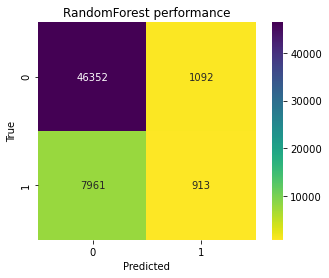

In [93]:
# Random Forest
Y_Pred= rf.predict(X_test)
print(classification_report(Y_test, Y_Pred))
#print(confusion_matrix(Y_test, rf_predictions))
conf_matrix = confusion_matrix(Y_test, Y_Pred)

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_Pred,Y_test))
#print("Precision score: {}".format(precision_score(Y_test,Y_Pred)))
print("Recall score: {}".format(recall_score(Y_test,Y_Pred)))

# roc_auc_score(Y_test, rf_probs)

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('RandomForest performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


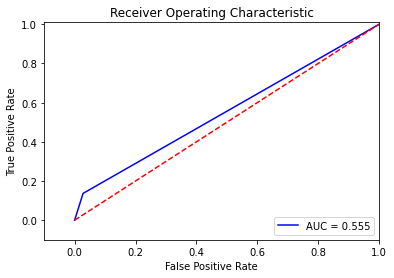

In [94]:
# ROC-AUC for Random Forest
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
# Apply performance metrics function on RandomForest
rf_int_rate, rf_CoR, rf_ROI = model_performance(Y_pred,'R Forest', total_CoR_test, loans_test, CoF)




Total loans approved = $0.783bn
Total loans charged off = $0.124bn
Modelled cost of risk is: 15.89%
Total saving = $18.0m

Weighted average interest rate: 13.18%
Weighted average term: 44.72 months

Interest earned: $323.0m
Interest paid: $88.0m
Profit is: $111.0m
Return on investment is: 14.23%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


              precision    recall  f1-score   support

           0       0.90      0.59      0.71     47444
           1       0.23      0.65      0.34      8874

    accuracy                           0.60     56318
   macro avg       0.57      0.62      0.53     56318
weighted avg       0.80      0.60      0.65     56318

Accuracy of the model is:  0.5987961220213786


Text(83.40000000000006, 0.5, 'True')

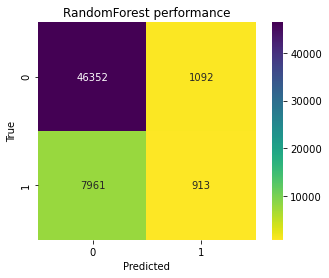

In [96]:
# Naive Bayes
naive= GaussianNB()
naive.fit(X_train, Y_train)

Y_pred= naive.predict(X_test)

# Summary of prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_Pred)

# Accuracy score
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('RandomForest performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


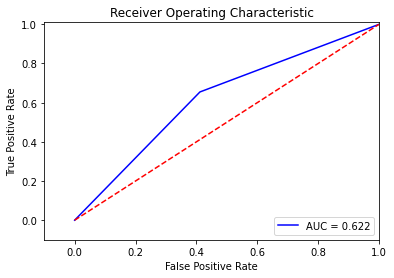

In [97]:
# ROC-AUC for Naive Bayes

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
# Apply performance metrics function on Naive Bayes
naive_int_rate, naive_CoR, naive_ROI = model_performance(Y_pred,'Naive Bayes', total_CoR_test, loans_test, CoF)

Total loans approved = $0.405bn
Total loans charged off = $0.045bn
Modelled cost of risk is: 11.08%
Total saving = $58.2m

Weighted average interest rate: 10.16%
Weighted average term: 41.44 months

Interest earned: $126.0m
Interest paid: $42.0m
Profit is: $40.0m
Return on investment is: 9.77%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [99]:
from sklearn.metrics import precision_recall_curve
def threshold_calculation(model, threshold_list):
#     pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
    for i in threshold_list:
        print ('\n******** For i = {} ******'.format(i))
        Y_test_pred = (model.predict_proba(X_test)[:,1]>i).astype("int32")
        test_accuracy = accuracy_score(Y_test, Y_test_pred)
        print('Our testing accuracy is {}'.format(test_accuracy))
        print(confusion_matrix(Y_test, Y_test_pred))
        
      
    #plot precision/recall curve against different thresholds
    
    pred_y = model.predict(X_test) 
    probs_y = model.predict_proba(X_test) # probs_y is probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
    precision, recall, thresholds = precision_recall_curve(Y_test, probs_y[:, 1])
    
    #retrieve probability of being 1(in second column of probs_y)
    pr_auc = auc(recall, precision)
    
    plt.subplot(1, 2, 1)
    plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
    
    
    plt.subplot(1, 2, 2)
    no_skill = len(Y_test[Y_test==1]) / len(Y_test)
    plt.title("Precision-Recall")
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    
    

### Imbalanced Data - Tuning with Class Weight and Undersampling 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

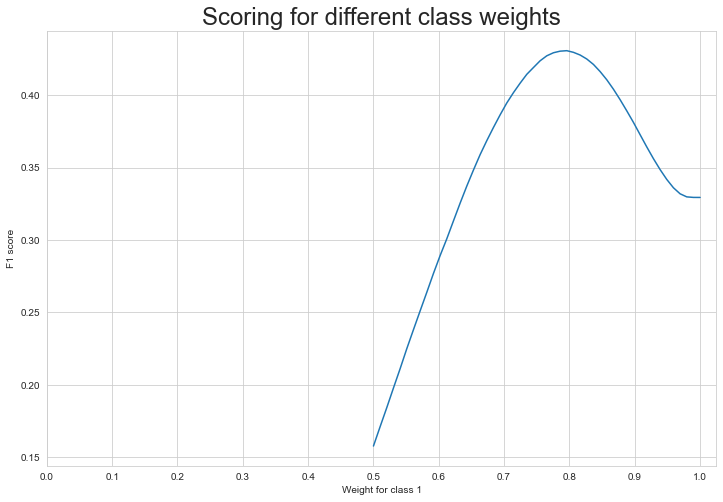

In [58]:
# Exploring best class weight for logistic regression
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import collections, numpy

lr = LogisticRegression()
# n = collections.Counter(Y_train)
# class_weights = {0:1 - n[0]/(n[0]+n[1]), 1:1 - n[1]/(n[0]+n[1])}
# penalty = ['l1', 'l2']
# C = np.logspace(0, 4, 10)
# param_grid = dict(C=C, penalty=penalty)



#Setting the range for class weights
weights = np.linspace(0.0,0.5)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}


#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, Y_train)


# logistic_cw = LogisticRegression(class_weight = class_weights, max_iter=1000)
# logistic_cw_grid = GridSearchCV(logistic_cw, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
# logistic_cw_grid.fit(X_train, Y_train)


#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [59]:
print('Best Params for logistic with class weights: ', gridsearch.best_params_)

Best Params for logistic with class weights:  {'class_weight': {0: 0.2040816326530612, 1: 0.7959183673469388}}


In [105]:
# Exploring class-weight - Applying Logistic Regression with class_weight

n = Y_train.value_counts()
#class_weights = {0:1- n[0]/n.sum(), 1:1- n[1]/n.sum()}
# class_weights
# Applying Logistic Regression on class weights (final ratio)
from sklearn.metrics import precision_score
logistic_cw = LogisticRegression(class_weight = {0: 0.2040816326530612, 1: 0.7959183673469388})
logistic_cw.fit(X_train, Y_train)

Y_pred_cw = logistic_cw.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred_cw))
print(confusion_matrix(Y_test, Y_pred_cw))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred_cw,Y_test))
print("Precision score: {}".format(precision_score(Y_test,Y_pred_cw)))
print("Recall score: {}".format(recall_score(Y_test,Y_pred_cw)))
conf_matrix = confusion_matrix(Y_test, Y_pred_cw)
roc_auc_score(Y_test, logistic_cw.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.92      0.53      0.67     47444
           1       0.23      0.76      0.36      8874

    accuracy                           0.57     56318
   macro avg       0.58      0.64      0.51     56318
weighted avg       0.81      0.57      0.62     56318

[[25097 22347]
 [ 2122  6752]]
Accuracy of the model is:  0.5655207926417841
Precision score: 0.23203546513625897
Recall score: 0.7608744647284201


0.6993501366601721

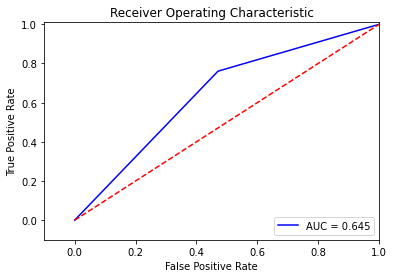

In [108]:
# ROC-AUC for Logistic regression + Class Weight

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_cw)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [109]:
# Performance metrics for Logistic regression + Class Weight
logistic_cw_int_rate, logistic_cw_CoR, logistic_cw_RoE = model_performance(Y_pred_cw,'logistic model (class weights)', total_CoR_test, loans_test, CoF)

Total loans approved = $0.36bn
Total loans charged off = $0.032bn
Modelled cost of risk is: 8.84%
Total saving = $77.0m

Weighted average interest rate: 9.25%
Weighted average term: 39.67 months

Interest earned: $100.0m
Interest paid: $36.0m
Profit is: $33.0m
Return on investment is: 9.12%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [ ]:
##Undersampling Behavior

In [112]:
# Explore undersampling in Logistic Regression
from imblearn.under_sampling import RandomUnderSampler 

# print("Before UnderSampling, counts of label '1': {}".format(sum(Y_train==1)))
# print("Before UnderSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

# ratio ={1: 221317, 0:400000} #ratio 0.55
rus = RandomUnderSampler(random_state =42)
X_train_rus, Y_train_rus = rus.fit_resample(X_train, Y_train.ravel())
print("After UnderSampling, counts of label '1': {}".format(sum(Y_train_rus==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(Y_train_rus==0)))

After UnderSampling, counts of label '1': 260486
After UnderSampling, counts of label '0': 260486


In [114]:
# Exploring class-weight - Applying Logistic Regression with class_weight + Undersampling

n = Y_train.value_counts()
#class_weights = {0:1- n[0]/n.sum(), 1:1- n[1]/n.sum()}
# class_weights
# Applying Logistic Regression on class weights (final ratio)
from sklearn.metrics import precision_score
logistic_us = LogisticRegression()
logistic_us.fit(X_train_rus, Y_train_rus)

Y_pred_us = logistic_us.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred_us))
print(confusion_matrix(Y_test, Y_pred_us))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred_us,Y_test))
print("Precision score: {}".format(precision_score(Y_test,Y_pred_us)))
print("Recall score: {}".format(recall_score(Y_test,Y_pred_us)))
conf_matrix = confusion_matrix(Y_test, Y_pred_us)
roc_auc_score(Y_test, logistic_cw.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.92      0.52      0.67     47444
           1       0.23      0.77      0.35      8874

    accuracy                           0.56     56318
   macro avg       0.58      0.64      0.51     56318
weighted avg       0.81      0.56      0.62     56318

[[24703 22741]
 [ 2062  6812]]
Accuracy of the model is:  0.5595901843105224
Precision score: 0.2305011335566609
Recall score: 0.7676357899481632


0.6983089532863169

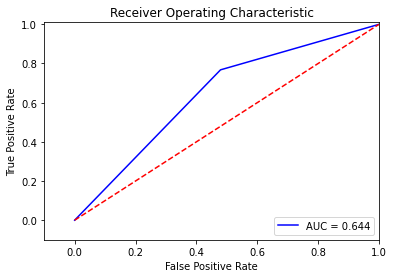

In [115]:
# ROC-AUC for Logistic regression + Undersampling

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_us)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [116]:
# Performance metrics for Logistic regression + Undersampling
logistic_us_int_rate, logistic_us_CoR, logistic_us_RoE = model_performance(Y_pred_us,'logistic model (class weights)', total_CoR_test, loans_test, CoF)

Total loans approved = $0.353bn
Total loans charged off = $0.031bn
Modelled cost of risk is: 8.73%
Total saving = $77.9m

Weighted average interest rate: 9.19%
Weighted average term: 39.6 months

Interest earned: $98.0m
Interest paid: $35.0m
Profit is: $32.0m
Return on investment is: 9.05%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [101]:
# Cross Validation to get best class weight for XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# define model
xg = xgb.XGBClassifier()
# define grid
weights = [10, 25, 50, 75, 99, 100]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
#cv = KFold(n_splits=10, n_repeats=3, random_state=1)
#cv=KFold(10,shuffle=True,random_state=42).get_n_splits(X_train.values)
# define grid search
grid = GridSearchCV(estimator=xg, param_grid=param_grid, n_jobs=-1,scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, Y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\Chait\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.723211 using {'scale_pos_weight': 10}


[07:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.26      0.41     47444
           1       0.19      0.94      0.32      8874

    accuracy                           0.37     56318
   macro avg       0.58      0.60      0.36     56318
weighted avg       0.84      0.37      0.39     56318

Accuracy of the model is:  0.36514080755708656


Text(83.40000000000006, 0.5, 'True')

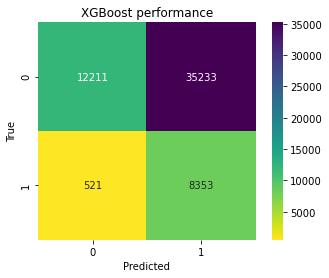

In [102]:
# Apply XGBoosting model on train data
import xgboost as xgb
xg = xgb.XGBClassifier()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators,scale_pos_weight=10)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train,Y_train)
Y_pred = xg.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('XGBoost performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

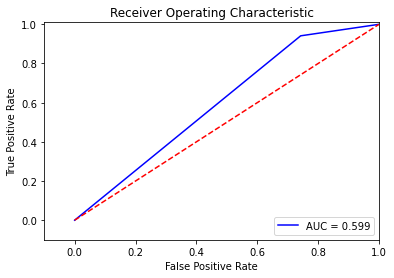

In [103]:
# ROC-AUC for XGBoost - Tuned

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
xg_cw_int_rate, xg_cw_CoR, xg_cw_RoE = model_performance(Y_pred_cw,'XGBoost (class weights)', total_CoR_test, loans_test, CoF)




<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


Total loans approved = $0.36bn
Total loans charged off = $0.032bn
Modelled cost of risk is: 8.84%
Total saving = $77.0m

Weighted average interest rate: 9.25%
Weighted average term: 39.67 months

Interest earned: $100.0m
Interest paid: $36.0m
Profit is: $33.0m
Return on investment is: 9.12%


C:\Users\Chait\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:25:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.58      0.71     47444
           1       0.25      0.75      0.37      8874

    accuracy                           0.61     56318
   macro avg       0.59      0.66      0.54     56318
weighted avg       0.82      0.61      0.66     56318

Accuracy of the model is:  0.6076565218935331


Text(83.40000000000006, 0.5, 'True')

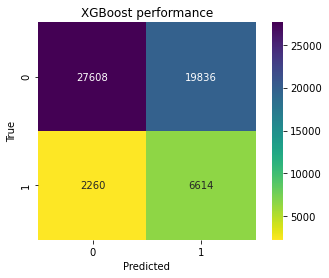

In [117]:
# Apply XGBoosting model on train data + Undersampling
import xgboost as xgb
xg = xgb.XGBClassifier()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train_rus,Y_train_rus)
Y_pred_us = xg.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred_us))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred_us)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred_us,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('XGBoost performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

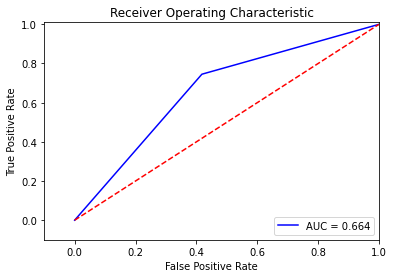

In [119]:
# ROC-AUC for XGBoost - undersampled

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_us)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
xg_us_int_rate, xg_us_CoR, xg_us_RoE = model_performance(Y_pred_us,'XGBoost (class weights)', total_CoR_test, loans_test, CoF)




Total loans approved = $0.388bn
Total loans charged off = $0.032bn
Modelled cost of risk is: 8.34%
Total saving = $81.2m

Weighted average interest rate: 9.54%
Weighted average term: 40.88 months

Interest earned: $116.0m
Interest paid: $40.0m
Profit is: $44.0m
Return on investment is: 11.25%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


### Neural Net

In [123]:
# Apply Neural Network algorithm

import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras.layers import Dense, Activation,Dropout
#from tensorflow.python.keras.optimizers import SGD

input_nodes = X_train.shape[1]
#output_nodes = 1

model = Sequential()
#model.add(Input((input_nodes,)))
model.add(Dense(units=16,activation="sigmoid"))
model.add(Dense(units=32, activation="sigmoid"))
model.add(Dense(units=2, activation="softmax"))
#model.add(Dense(output_nodes))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    
model.fit(X_train, Y_train, batch_size=20, validation_split=0.1, epochs=50,verbose=2)

Epoch 1/50
58131/58131 - 76s - loss: 0.4531 - accuracy: 0.8025 - val_loss: 0.4604 - val_accuracy: 0.7961
Epoch 2/50
58131/58131 - 74s - loss: 0.4509 - accuracy: 0.8033 - val_loss: 0.4601 - val_accuracy: 0.7961
Epoch 3/50
58131/58131 - 74s - loss: 0.4502 - accuracy: 0.8036 - val_loss: 0.4596 - val_accuracy: 0.7961
Epoch 4/50
58131/58131 - 74s - loss: 0.4497 - accuracy: 0.8035 - val_loss: 0.4589 - val_accuracy: 0.7963
Epoch 5/50
58131/58131 - 73s - loss: 0.4495 - accuracy: 0.8036 - val_loss: 0.4586 - val_accuracy: 0.7964
Epoch 6/50
58131/58131 - 73s - loss: 0.4493 - accuracy: 0.8036 - val_loss: 0.4590 - val_accuracy: 0.7959
Epoch 7/50
58131/58131 - 75s - loss: 0.4492 - accuracy: 0.8036 - val_loss: 0.4590 - val_accuracy: 0.7967
Epoch 8/50
58131/58131 - 73s - loss: 0.4490 - accuracy: 0.8038 - val_loss: 0.4585 - val_accuracy: 0.7964
Epoch 9/50
58131/58131 - 75s - loss: 0.4489 - accuracy: 0.8037 - val_loss: 0.4581 - val_accuracy: 0.7967
Epoch 10/50
58131/58131 - 74s - loss: 0.4487 - accuracy

Accuracy: 83.90
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     47444
           1       0.46      0.11      0.18      8874

    accuracy                           0.84     56318
   macro avg       0.66      0.54      0.55     56318
weighted avg       0.79      0.84      0.80     56318

Confusion Matrix:


Text(83.40000000000006, 0.5, 'True')

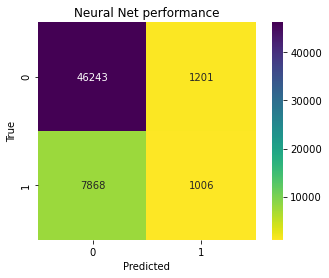

In [124]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, np.argmax(Y_pred, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(classification_report(Y_test, np.argmax(Y_pred, axis=1)))
print('Confusion Matrix:')
#print(confusion_matrix(Y_test, np.argmax(Y_pred, axis=1)))

conf_matrix = confusion_matrix(Y_test, np.argmax(Y_pred, axis=1))
# Accuracy
#print("Accuracy of the model is: ", accuracy_score(Y_pred_us,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('Neural Net performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


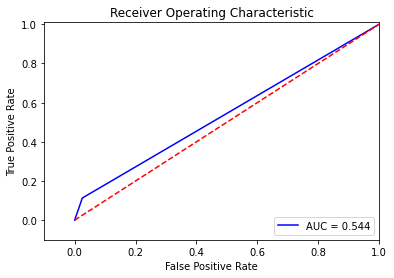

In [128]:
# ROC-AUC for XGBoost - undersampled

fpr, tpr, thresholds = roc_curve(Y_test, np.argmax(Y_pred, axis=1))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
nn_int_rate, nn_us_CoR, nn_us_RoE = model_performance(np.argmax(Y_pred, axis=1),'Neural Net', total_CoR_test, loans_test, CoF)




Total loans approved = $0.788bn
Total loans charged off = $0.128bn
Modelled cost of risk is: 16.28%
Total saving = $14.7m

Weighted average interest rate: 13.22%
Weighted average term: 44.77 months

Interest earned: $325.0m
Interest paid: $88.0m
Profit is: $109.0m
Return on investment is: 13.81%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


### Simulation

In [611]:
#gives back necessary financial metrics of loan data for comparison
def ROI_total(df):
    """
    Function to return all of the financial returns data for comparing the models
    returns: the total book return on equity in %
    """
        
    weighted_term = df['term_amnt'].sum() / df['loan_amnt'].sum()
    weighted_interest = df['int_amnt'].sum() / df['loan_amnt'].sum()
    charge_off_rate = df['loan_class'].value_counts(normalize=True)
    charge_off_amount = df.groupby('loan_class').loan_amnt.sum() #dollar amount of each loan_class
    total_CoR = charge_off_amount[1] / df['loan_amnt'].sum() #dollar amount of default loans

    loans_approved = df.loan_amnt.sum() #total dollar amount of loans 
    loans_charged_off = charge_off_amount[1] #total dollar amount of default loans

    # And therefore, the RoE:
    loans_returned = loans_approved - loans_charged_off #total loan amount paid back
    interest_earned = loans_returned * (weighted_interest) / 100 * (weighted_term / 12) #interest amount per year 
    interest_paid = loans_approved * CoF / 100 * (weighted_term / 12) #CoF (cost of funds)
    profit = interest_earned - interest_paid - loans_charged_off
    ROI = profit / loans_approved


    return ROI

In [695]:
def ROI_model(y_pred, column, total_CoR_test, df, CoF):
    """
    Compares model prediction metrics against the metrics of the test set loans as well as CoR
    y_pred - the model prediction of loan class
    Returns interest rate, cost of risk and ROI of the book in % 
    """
    # Adding new column with the predicted charge off rate
    df[column] = y_pred
    y_test_paid = shuffle(df.loc[df[column].isin([0])])[0:100]
    performance = y_test_paid.groupby('loan_class').loan_amnt.sum()
    

    # CoR is the proportion that was charged off:
    loans_approved = performance.sum()
    loans_charged_off = performance[1]
    CoR = loans_charged_off / loans_approved

    saving = df['loan_amnt'].sum() * (total_CoR_test - CoR)

    weighted_interest = y_test_paid['int_amnt'].sum() / y_test_paid['loan_amnt'].sum()
    weighted_term = y_test_paid['term_amnt'].sum() / y_test_paid['loan_amnt'].sum()

    # ROI
    loans_returned = loans_approved - loans_charged_off
    interest_earned = loans_returned * weighted_interest / 100 * (weighted_term / 12)
    interest_paid = loans_approved * CoF / 100 * (weighted_term / 12)
    profit = interest_earned - interest_paid - loans_charged_off
    ROI = (profit / loans_approved)
    


    return ROI

In [680]:
def modeling(X_train, Y_train):

#     n = Y_train.value_counts()
#     class_weights = {0:1- n[0]/n.sum(), 1:1- n[1]/n.sum()}
# class_weights
# Applying Logistic Regression on class weights (final ratio)

    logistic_cw = LogisticRegression(C= 1291.54, class_weight = class_weights, max_iter=1000)
    logistic_cw.fit(X_train, Y_train)

    y_pred = logistic_cw.predict(X_test)
    
    return y_pred



In [681]:
y_pred = modeling(X_train, Y_train)

In [697]:
ROI_model(Y_pred,'logistic model (class weights)', total_CoR_test, loans_test, ROI)

<ipython-input-695-7366f737d7f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


0.07858106032237819

In [699]:


model_ROI = []
lc_ROI = []

for i in range(10):
    loan_shuffled = shuffle(loans)
    l_ROI = ROI_total(loan_shuffled[0:100])
    lc_ROI.append(l_ROI)
    
    y_pred = modeling(X_train, Y_train)
    m_ROI = ROI_model(Y_pred,'logistic model (class weights)', total_CoR_test, loans_test, ROI)
    model_ROI.append(m_ROI)

    
    

<ipython-input-695-7366f737d7f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred
<ipython-input-695-7366f737d7f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred
<ipython-input-695-7366f737d7f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

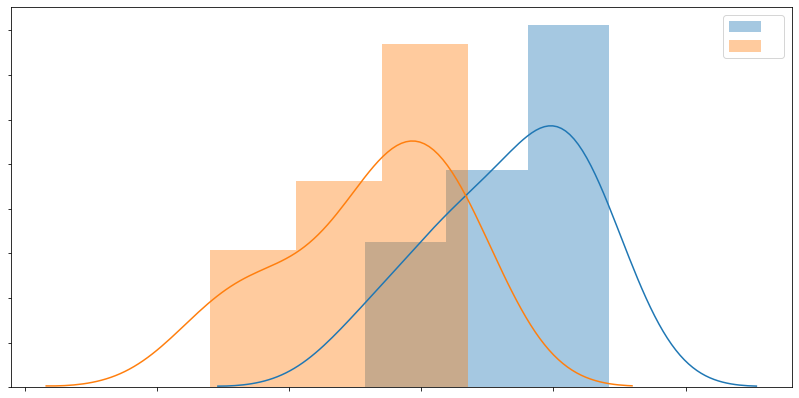

In [700]:

# Plot histogram of IRR
ROI_df = pd.DataFrame()
ROI_df['model_ROI'] = model_ROI
ROI_df['lc_ROI'] = lc_ROI

fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(tuple(ROI_df['model_ROI']))
ax = sns.distplot(tuple(ROI_df['lc_ROI']))


ax.set_xlabel("Rate of Return",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend(labels=["Model ROI", 'Benchmark (Lending Club) ROI'], fontsize=16)
plt.savefig(fname='ROI_Hist', dpi=150)
plt.show()